# Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Display properties
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from IPython.display import display, HTML

# Date
import datetime
from datetime import date, timedelta


# Maps
from math import pi

import pickle 



In [2]:
#Sklearn packages

# Import required packages for pre and post processing
from sklearn.preprocessing import normalize

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram



# Read Data

In [3]:
git_url = 'https://raw.githubusercontent.com/nazihkalo/FIFA19-Scouting-Analysis/master/FIFA19_data.csv'

fifa = pd.read_csv(git_url)

In [4]:
country_url = 'https://raw.githubusercontent.com/nazihkalo/FIFA19-Scouting-Analysis/master/coun_by_cont.csv'

countries_cont = pd.read_csv(country_url)

In [5]:
# Copy of the dataframe
fifa.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   
4  €355K     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   
4          4.0      High/ High      Normal       Yes      RCM            7.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004         NaN                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018         NaN                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017         NaN                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011         NaN                 2020    6'4  168lbs   NaN   NaN   
4  Aug 30, 2015         NaN                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     8

In [6]:
#Checking dataset for NA values
total_num = fifa.isnull().sum().sort_values(ascending=False)

perc = fifa.isnull().sum()/fifa.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
fifa_null = pd.concat([total_num, perc1], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

#Top nulls
top_null = fifa_null[fifa_null["Percentage %"]>0]
top_null.reset_index(inplace=True)
top_null.columns = ['index', "Total Missing Values", "Percentage %"]
top_null.head(10)

index  Total Missing Values  Percentage %
0  Loaned From                 16943         93.06
1          RAM                  2085         11.45
2           LS                  2085         11.45
3           ST                  2085         11.45
4           RS                  2085         11.45
5           LW                  2085         11.45
6           LF                  2085         11.45
7           CF                  2085         11.45
8           RF                  2085         11.45
9           RW                  2085         11.45

Text(0.5, 1, 'Missing Values by column')

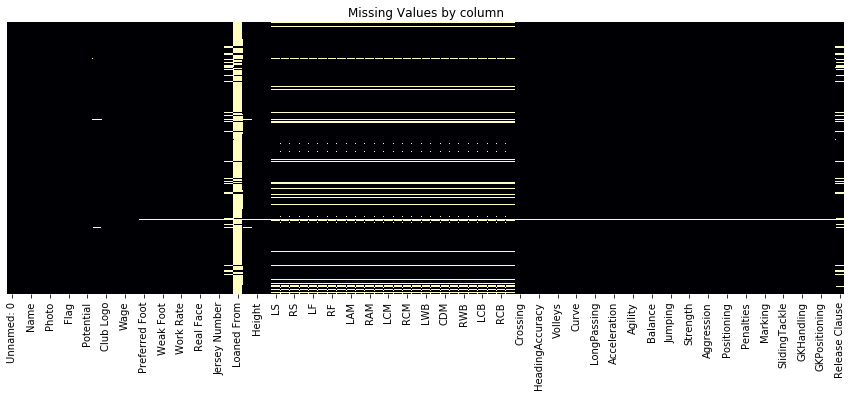

In [7]:
plt.figure(figsize=(15,5))
sns.heatmap(fifa.isnull(), cbar = False, yticklabels=False, cmap="magma" )
plt.title('Missing Values by column')

# Feature Engineering

## Dropping Columns 

In [8]:
fifa.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   
4  €355K     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   
4          4.0      High/ High      Normal       Yes      RCM            7.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004         NaN                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018         NaN                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017         NaN                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011         NaN                 2020    6'4  168lbs   NaN   NaN   
4  Aug 30, 2015         NaN                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     8

In [9]:
#Drop some columns
fifa = fifa.drop(['ID', 'Photo', 'Flag', 'Club Logo'], axis = 1)

In [10]:
#Rename unamed to ID
fifa = fifa.rename({'Unnamed: 0' : 'ID'}, axis = 1)

In [11]:
#fifa.replace('nan',np.nan, inplace=True)

## Clean columns 

In [12]:
# The value has some non numeric mark so I extract rigth value
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

#Create float Value column
fifa['Value'] = fifa['Value'].apply(value_to_int)

#Create float Wage Column
fifa['Wage'] = fifa['Wage'].apply(value_to_int)


#Create float Wage Column
fifa['Release Clause'] = fifa['Release Clause'].astype(str)
fifa['Release Clause'] = fifa['Release Clause'].apply(value_to_int)


print(fifa['Value'].head())
print(fifa['Wage'].head())
print(fifa['Release Clause'].head())

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64
0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64
0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64


In [13]:
#Left foot = 0 Right foot = 1
fifa['Preferred Foot'] = fifa['Preferred Foot'].apply(lambda x: 0 if x == 'Left' else 1)

In [14]:
fifa['Club'] = fifa['Club'].fillna('No_Club')

In [15]:
#Add club reputation column
fifa['Club_Reputation'] =  fifa['International Reputation'].groupby(fifa['Club']).transform('mean')


In [16]:
#Work Rate

fifa['Work Rate'] = fifa['Work Rate'].astype(str)

split_wr = fifa['Work Rate'].str.split('/', n=1, expand = True)

#Create attack/defense work rate from Work rate and drop wr
fifa['Attack_WR'] = split_wr[0]
fifa['Defense_WR'] = split_wr[1]
fifa = fifa.drop('Work Rate', axis = 1)

fifa['Defense_WR'] = fifa['Defense_WR'].str.strip()

In [17]:
#Fill in miscellaneous body types 
fifa['Body Type'].replace({'Messi':'Lean', 
                           'Neymar':'Lean', 
                           'Shaqiri':'Stocky', 
                           'Courtois':'Normal', 
                           'Akinfenwa':'Stocky',
                           'PLAYER_BODY_TYPE_25':'Lean',
                           'C. Ronaldo':'Normal'}, inplace = True)


In [18]:
#Drop rows with missing Body Type - these values also are missing most other columns
fifa.dropna(subset=['Body Type'], inplace = True)

In [19]:
#Real Face: Yes = 1 No = 0
fifa['Real Face'] = fifa['Real Face'].apply(lambda x: 1 if x == 'Yes' else 0)

## Create Position Group

In [20]:
#Define position groups
forwards = ['RF', 'ST', 'LW','LF', 'RS', 'LS', 'RW', 'CF' ]
defenders = ['RCB','CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB']
mids = ['RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM']
gk = ['GK']

#Create Function to apply to df
def label_position(row):
    if row['Position'] in forwards:
        return 'Forward'
    if row['Position'] in defenders:
        return 'Defender'
    if row['Position'] in mids:
        return 'Midfielder'
    if row['Position'] in gk:
        return 'GoalKeeper'
    return 'Other'

#Create Position_group column of 4 Main positions
fifa['Position_Group'] = fifa.apply(lambda row: label_position(row), axis = 1)

#Turn it into categorical variable 
fifa['Position_Group'] = fifa['Position_Group'].astype('category')

In [21]:
fifa['Joined'] = pd.to_datetime(fifa['Joined'], format = '%b %d, %Y')

#Keep only the date 
fifa['Joined'] = fifa['Joined'].dt.date

fifa['Joined'] = [datetime.date(2019, 1, 1) - x for x in fifa['Joined']]

fifa['Joined'] = fifa['Joined'].astype(str)

fifa['Joined'] = fifa.Joined.str.split("days").apply(lambda x: x[0])

fifa['Joined'] = fifa['Joined'].replace('NaT', '0')

fifa['Joined'] = fifa['Joined'].astype(int)

In [22]:
#Binary - loan or not
fifa.set_value(fifa.index[~fifa['Loaned From'].isnull()],'Loaned From', 1)
fifa.set_value(fifa.index[fifa['Loaned From'].isnull()],'Loaned From', 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



ID                  Name  Age          Nationality  Overall  \
0          0              L. Messi   31            Argentina       94   
1          1     Cristiano Ronaldo   33             Portugal       94   
2          2             Neymar Jr   26               Brazil       92   
3          3                De Gea   27                Spain       91   
4          4          K. De Bruyne   27              Belgium       91   
5          5             E. Hazard   27              Belgium       91   
6          6             L. Modrić   32              Croatia       91   
7          7             L. Suárez   31              Uruguay       91   
8          8          Sergio Ramos   32                Spain       91   
9          9              J. Oblak   25             Slovenia       90   
10        10        R. Lewandowski   29               Poland       90   
11        11              T. Kroos   28              Germany       90   
12        12              D. Godín   32              Uruguay       90   
13        13           David Silva   32                Spain       90   
14        14              N. Kanté   27               France       89   
15        15             P. Dybala   24            Argentina       89   
16        16               H. Kane   24              England       89   
17        17          A. Griezmann   27               France       89   
18        18         M. ter Stegen   26              Germany       89   
19        19           T. Courtois   26              Belgium       89   
20        20       Sergio Busquets   29                Spain       89   
21        21             E. Cavani   31              Uruguay       89   
22        22              M. Neuer   32              Germany       89   
23        23             S. Agüero   30            Argentina       89   
24        24          G. Chiellini   33                Italy       89   
25        25             K. Mbappé   19               France       88   
26        26              M. Salah   26                Egypt       88   
27        27              Casemiro   26               Brazil       88   
28        28          J. Rodríguez   26             Colombia       88   
29        29            L. Insigne   27                Italy       88   
30        30                  Isco   26                Spain       88   
31        31            C. Eriksen   26              Denmark       88   
32        32              Coutinho   26               Brazil       88   
33        33         P. Aubameyang   29                Gabon       88   
34        34            M. Hummels   29              Germany       88   
35        35               Marcelo   30               Brazil       88   
36        36               G. Bale   28                Wales       88   
37        37             H. Lloris   31               France       88   
38        38            G. Higuaín   30            Argentina       88   
39        39          Thiago Silva   33               Brazil       88   
40        40         S. Handanovič   33             Slovenia       88   
41        41             G. Buffon   40                Italy       88   
42        42             S. Umtiti   24               France       87   
43        43             M. Icardi   25            Argentina       87   
44        44          K. Koulibaly   27              Senegal       87   
45        45              P. Pogba   25               France       87   
46        46              K. Navas   31           Costa Rica       87   
47        47             R. Lukaku   25              Belgium       87   
48        48           C. Immobile   28                Italy       87   
49        49            Jordi Alba   29                Spain       87   
...      ...                   ...  ...                  ...      ...   
18157  18157             K. Taylor   17              England       48   
18158  18158              T. Lawal   18              Austria       48   
18159  18159              L. Jagne   20              England       4

In [23]:
#Change Contract Valid Until to the years from 2018 

fifa['Contract Valid Until'] = fifa['Contract Valid Until'].astype(str)

fifa['Contract Valid Until'] = [x[-4:] for x in fifa['Contract Valid Until']]

fifa['Contract Valid Until'] = fifa['Contract Valid Until'].replace({'nan': '2018'})

fifa['Contract Valid Until'] = fifa['Contract Valid Until'].astype(int) - 2018

In [24]:
#Convert height from feet'inches to centimeters

def parse_ht(ht):
    # format: 7'0
    ht_ = ht.split("'")
    ft_ = int(ht_[0])
    in_ = int(ht_[1])
    return round(((12*ft_) + in_)*2.54) 
  
fifa['Height'] = fifa['Height'].apply(lambda x:parse_ht(x))


In [25]:
fifa['Weight'] = fifa['Weight'].astype(str).str.replace('lbs', '').astype(int)

In [26]:
fifa['Position_Potential'] = fifa['LS']

def potential(x):
  x = str(x)
  if('+' in x):
    calc = x.split('+')
    return int(calc[1])
  else:
    return int(0)

fifa['Position_Potential'] = fifa['Position_Potential'].apply(potential)

fifa['Position_Potential'].head()


0    2
1    3
2    3
3    0
4    3
Name: Position_Potential, dtype: int64

In [27]:
#Get rid of the +int at the end of the position overall columns
def get_rid(x):
  x = str(x)
  if('+' in x):
    calc = x.split('+')
    return int(calc[0])
  elif x.isdigit():
    return int(x)
  else:
    return int(0)


for column in fifa.loc[:,'LS':'RB']:
  fifa[column] = fifa[column].apply(get_rid)

In [28]:
#Create the attribute group mean columns
fifa['Attacking'] = fifa.loc[:,'Crossing':'Volleys'].mean(axis=1)
fifa['Skill'] = fifa.loc[:,'Dribbling':'BallControl'].mean(axis=1)
fifa['Movement'] = fifa.loc[:,'Acceleration':'Balance'].mean(axis=1)
fifa['Power'] = fifa.loc[:,'ShotPower':'LongShots'].mean(axis=1)
fifa['Mentality'] = fifa.loc[:,'Aggression':'Composure'].mean(axis=1)
fifa['Defending'] = fifa.loc[:,'Marking':'SlidingTackle'].mean(axis=1)
fifa['GoalKeeping'] = fifa.loc[:,'GKDiving':'GKReflexes'].mean(axis=1)



In [29]:
#Fill in the empty Position values based on the players' max ability

for index, row in fifa.loc[fifa['Position_Group'] == 'Other', ['Attacking', 'Defending', 'GoalKeeping']].iterrows():
  if (row[0] > row[1]) & (row[0] > row[2]):
    fifa.loc[index, 'Position'] = 'ST'
  elif (row[1] > row[0]) & (row[1] > row[2]):
    fifa.loc[index, 'Position'] = 'CB'
  elif(row[2] > row[0]) & (row[2] > row[1]):
    fifa.loc[index, 'Position'] = 'GK'
  else:
    fifa.loc[index, 'Position'] = 'CM'

In [30]:
#Fill Jersey Number with mode from their position

for index, row in fifa.loc[fifa['Position_Group'] == 'Other', ['Position', 'Jersey Number']].iterrows():
  if row[0] == 'CB':
    fifa.loc[index, 'Jersey Number'] = float(fifa[fifa['Position'] == 'CB']['Jersey Number'].mode().values)
  elif row[0] == 'ST':
    fifa.loc[index, 'Jersey Number'] = float(fifa[fifa['Position'] == 'ST']['Jersey Number'].mode().values)
  elif row[0] == 'GK':
    fifa.loc[index, 'Jersey Number'] = float(fifa[fifa['Position'] == 'GK']['Jersey Number'].mode().values)
  else:
    fifa.loc[index, 'Jersey Number'] = float(fifa[fifa['Position'] == 'CM']['Jersey Number'].mode().values)


In [31]:
#Fill their Position_Group for these new imputed positions

#Create Position_group column of 4 Main positions
fifa['Position_Group'] = fifa.apply(lambda row: label_position(row), axis = 1)

#Turn it into categorical variable 
fifa['Position_Group'] = fifa['Position_Group'].astype('category')

In [32]:
#Create Potential - Difference column to measure improvement potential
fifa['Potential_Difference'] = fifa['Potential'] - fifa['Overall']

In [33]:
countries_cont.head()

Country Continent
0       Algeria    Africa
1        Angola    Africa
2         Benin    Africa
3      Botswana    Africa
4  Burkina Faso    Africa

In [34]:
fifa = fifa.merge(countries_cont, how = 'left', left_on = 'Nationality', right_on = 'Country')

fifa = fifa.drop('Country', axis = 1)

In [35]:
#Find mean wage by overall quartiles
wage_groups = fifa.groupby(pd.qcut(fifa['Overall'],4)).mean()['Wage']

#Fill the 0 wages with group mean
for index, row in fifa.loc[fifa['Wage'] == 0, ['Wage', 'Overall']].iterrows():
  if row[1] <= 62:
    fifa.loc[index, 'Wage'] = round(wage_groups[0])
  elif (row[1] >62) &  (row[1] <= 66):
    fifa.loc[index, 'Wage'] = round(wage_groups[1])
  elif (row[1] > 66) &  (row[1] <= 71):
    fifa.loc[index, 'Wage'] = round(wage_groups[2])
  elif row[1] >71:
    fifa.loc[index, 'Wage'] = round(wage_groups[3])
  else:
    fifa.loc[index, 'Wage'] = 0

## Save and load pickle of processed dataframe

In [36]:
#with open('fifa_processed.pkl', 'wb') as f:
#  pickle.dump(fifa, f)

In [37]:
#with open('fifa_processed.pkl', 'rb') as f:
#  fifa = pickle.load(f)

# Exploratory Data Analysis 

## Age Analysis

Mean Age =  25.12
Median Age =  25.0
SD Age =  4.67


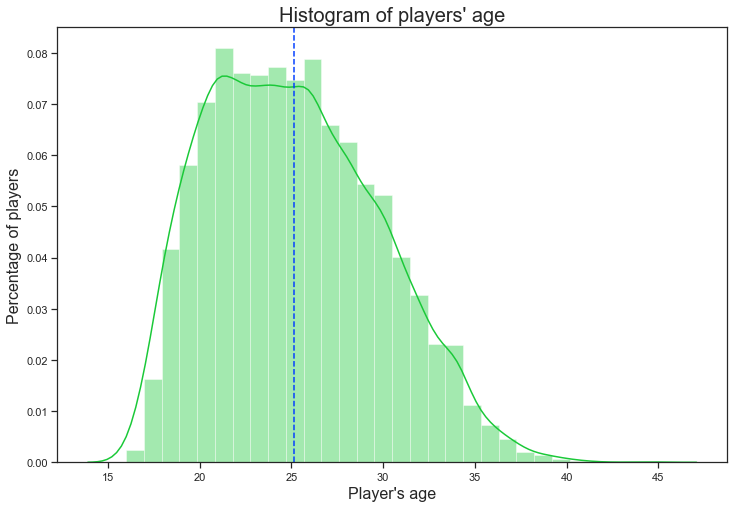

In [38]:
# Histogram: number of players's age
sns.set(style ="ticks", palette = 'bright', color_codes=True)

x = fifa.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 30, kde = True, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Percentage of players', fontsize=16)
ax.set_title(label="Histogram of players' age", fontsize=20)

plt.axvline(x =fifa['Age'].mean(), ymin = 0, ymax = 1, linestyle = '--')

#Add legend for mean line

print('Mean Age = ', round(fifa['Age'].mean(),2))
print('Median Age = ', round(fifa['Age'].median(),2))
print('SD Age = ', round(fifa['Age'].std(),2))


plt.show()

Mean Overall =  66.25
Median Overall =  66.0
SD Overall =  6.91


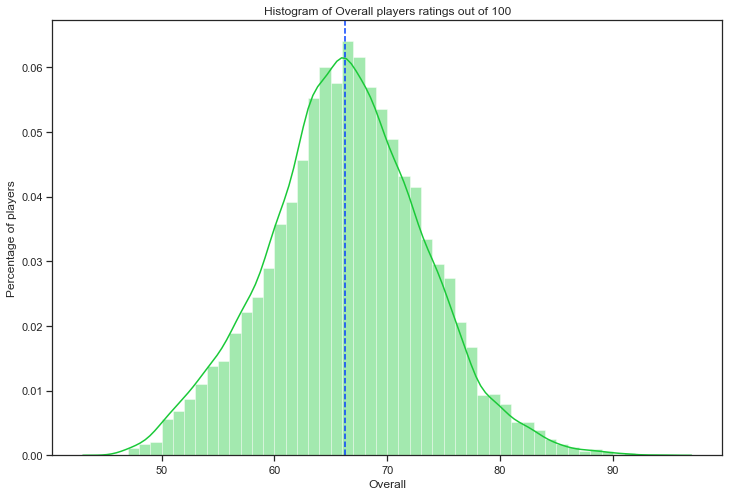

In [39]:
plt.figure(figsize = (12,8))
ax = sns.distplot(fifa['Overall'], bins = 48, kde = True, color = 'g')
#plt.annotate(('Mean = '+ str(round(fifa['Overall'].mean(),2))), (64,1150), color = 'blue')

ax.set_ylabel(ylabel='Percentage of players', fontsize=12)


plt.axvline(x =fifa['Overall'].mean(), ymin = 0, ymax = 1, linestyle = '--')

print('Mean Overall = ', round(fifa['Overall'].mean(),2))
print('Median Overall = ', round(fifa['Overall'].median(),2))
print('SD Overall = ', round(fifa['Overall'].std(),2))


plt.title('Histogram of Overall players ratings out of 100')
plt.show()

In [40]:
from IPython.display import display, HTML

In [41]:
age_overall = pd.DataFrame(fifa.groupby(pd.qcut(fifa['Age'], 5)).mean()[['Overall', 'Potential']]).reset_index()

age_overall['Age'] = ['16-21', '21-23', '23-26', '26-29', '29+']

Overall  Potential
Age                      
16-21    60.82      73.24
21-23    65.63      72.70
23-26    67.96      71.20
26-29    69.15      69.53
29+      69.45      69.45

Text(0.5, 1.0, 'Potential Distribution by Age Groups')

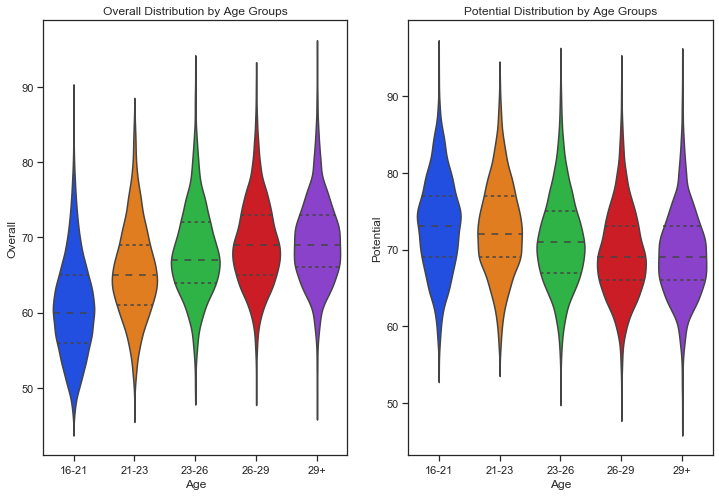

In [42]:

fig, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize = (12,8))

sns.violinplot(x = pd.qcut(fifa['Age'], 5), y= 'Overall', data = fifa, inner = 'quartile', ax = ax[0])
ax[0].set_xticklabels(['16-21', '21-23', '23-26', '26-29', '29+'])
ax[0].set_ylabel('Overall')
ax[0].set_title('Overall Distribution by Age Groups')


display(age_overall.round(2).set_index('Age'))

sns.violinplot(x = pd.qcut(fifa['Age'], 5), y= 'Potential', data = fifa, inner = 'quartile', ax = ax[1])
ax[1].set_xticklabels(['16-21', '21-23', '23-26', '26-29', '29+'])
ax[1].set_ylabel('Potential')
ax[1].set_title('Potential Distribution by Age Groups')


Text(0.5, 1.0, 'Overall Distribution by Continent')

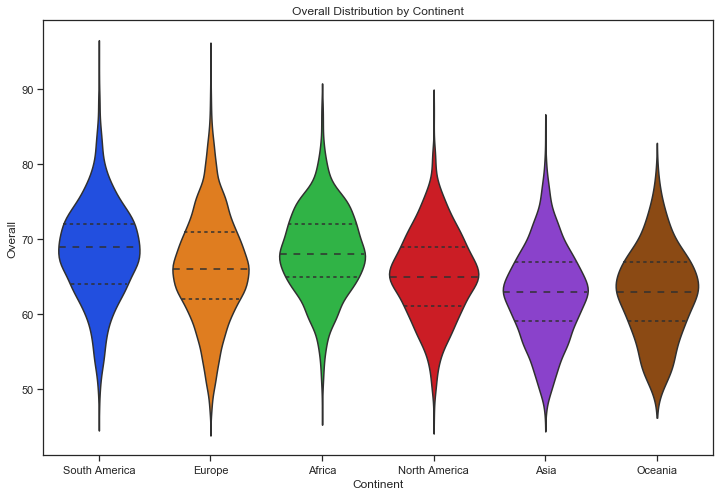

In [43]:
plt.figure(figsize = (12,8))


ax = sns.violinplot(x = 'Continent', y= 'Overall', data = fifa, inner = 'quartile', scale = 'area')
ax.set_title('Overall Distribution by Continent')


## Value Analysis

Text(0.5, 1.0, 'Overall Distribution by Continent')

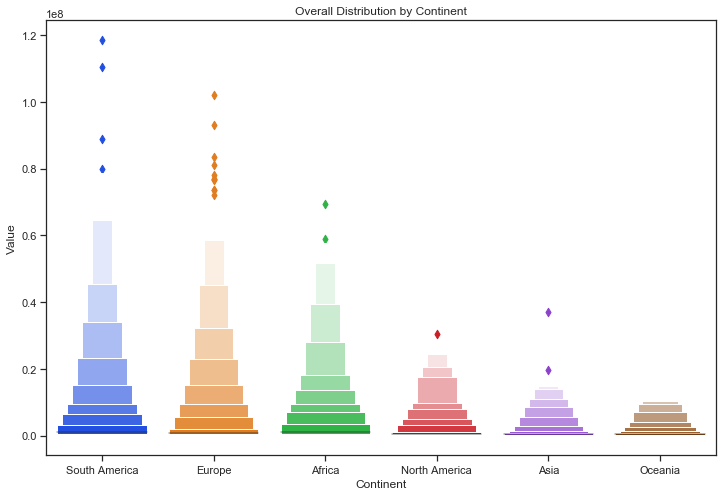

In [44]:
plt.figure(figsize = (12,8))


ax = sns.boxenplot(x= 'Continent', y= 'Value', data = fifa, scale = 'linear')

ax.set_title('Overall Distribution by Continent')


<Figure size 864x576 with 0 Axes>

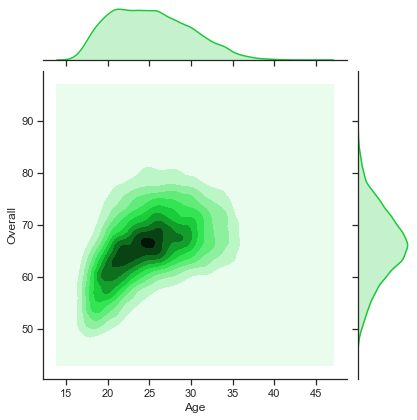

In [45]:
plt.figure(figsize = (12,8))

sns.jointplot(x= 'Age', y = 'Overall', data=fifa,
              kind="kde", color="g")


Wage/Value Correlation =  0.86


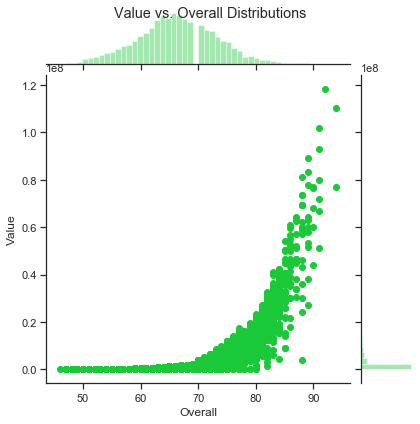

In [46]:
ax = sns.jointplot(x= 'Overall', y = 'Value', data=fifa,
              kind="scatter" ,color="g", )

ax.fig.suptitle('Value vs. Overall Distributions')

print('Wage/Value Correlation = ', round(fifa.Wage.corr(fifa.Value), 2))


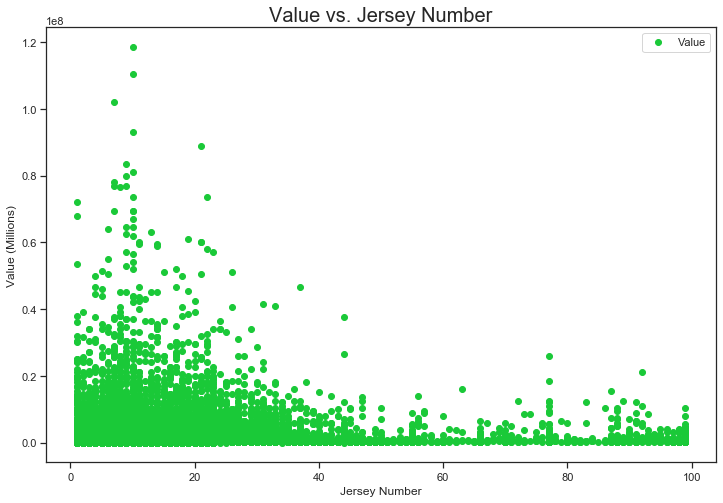

In [47]:
# Value vs. Jersey Number
fig, ax = plt.subplots(figsize= (12,8))

plt.scatter(x = 'Jersey Number', y = 'Value' , color= 'g' ,data = fifa)

plt.ylabel('Value (Millions)')
plt.xlabel('Jersey Number')
plt.title('Value vs. Jersey Number', fontsize = 20)
plt.legend()

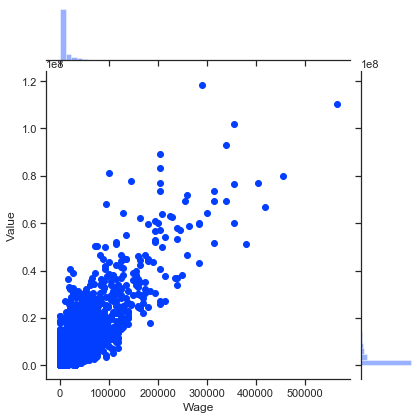

In [48]:
sns.jointplot(x = 'Wage', y = 'Value', data = fifa)


Text(0.5, 1.0, 'Value vs. Special')

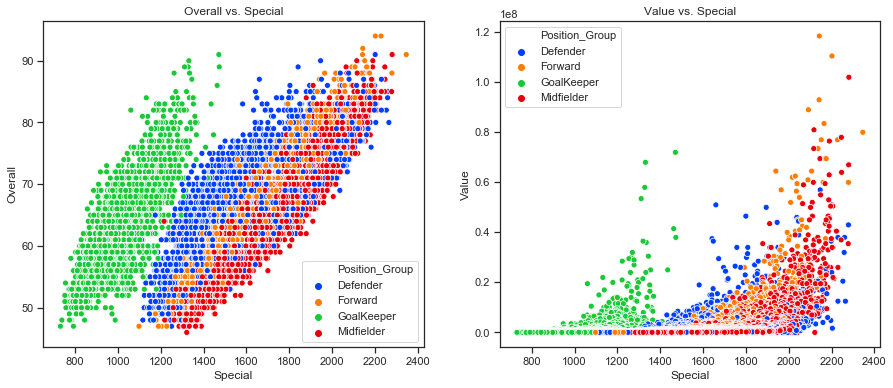

In [49]:
fig, ax = plt.subplots(1,2,figsize = (15,6))

sns.scatterplot('Special','Overall', data = fifa, hue = 'Position_Group', ax = ax[0])

ax[0].set_title('Overall vs. Special')

sns.scatterplot('Special','Value', data = fifa, hue = 'Position_Group',ax = ax[1])

ax[1].set_title('Value vs. Special')

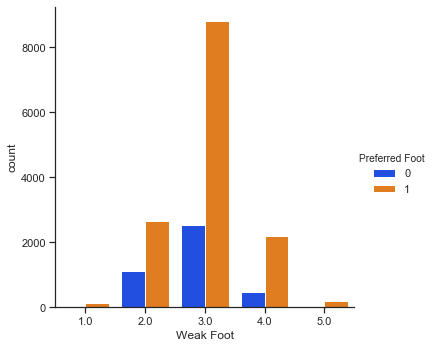

In [50]:
# Move to appendix for now
sns.catplot(x = 'Weak Foot', hue = 'Preferred Foot' ,kind = 'count', data = fifa)

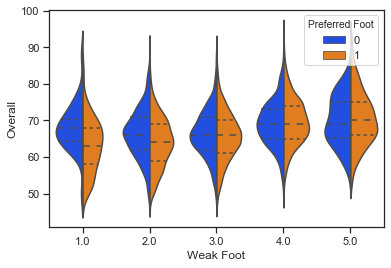

In [51]:
# Move to appendix for now

sns.violinplot(x='Weak Foot', 
               y='Overall', 
               hue='Preferred Foot', 
               data=fifa, 
               split=True,inner='quart', scale = 'area' )

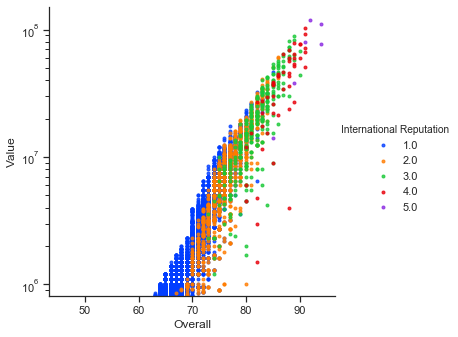

In [52]:
# Move to appendix for now

ax= sns.lmplot(x= 'Overall', y='Value', hue ='International Reputation', data=fifa, fit_reg = False, markers = '.', )

ax.set(yscale="log",)

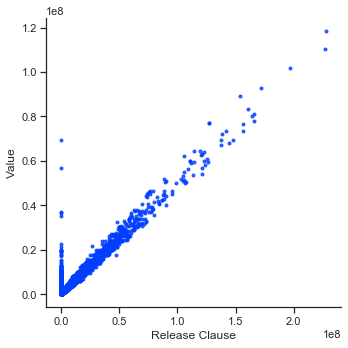

In [53]:
ax= sns.lmplot(x= 'Release Clause', y='Value', data=fifa, fit_reg = False, markers = '.', )


<Figure size 1080x864 with 0 Axes>

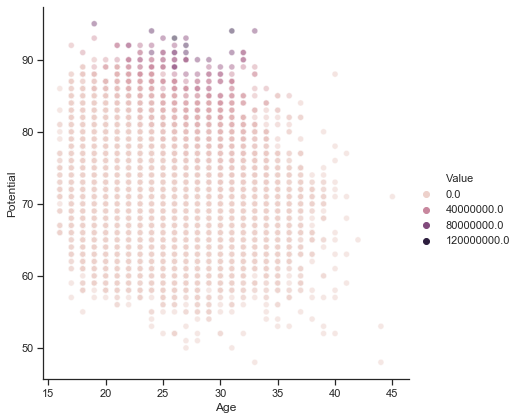

In [54]:
# Relation potential and age with respected value of players
plt.figure(figsize = (15,12))

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue='Value', 
            sizes=(40, 400), alpha=.5,
            height=6, data=fifa);

## Position Analysis

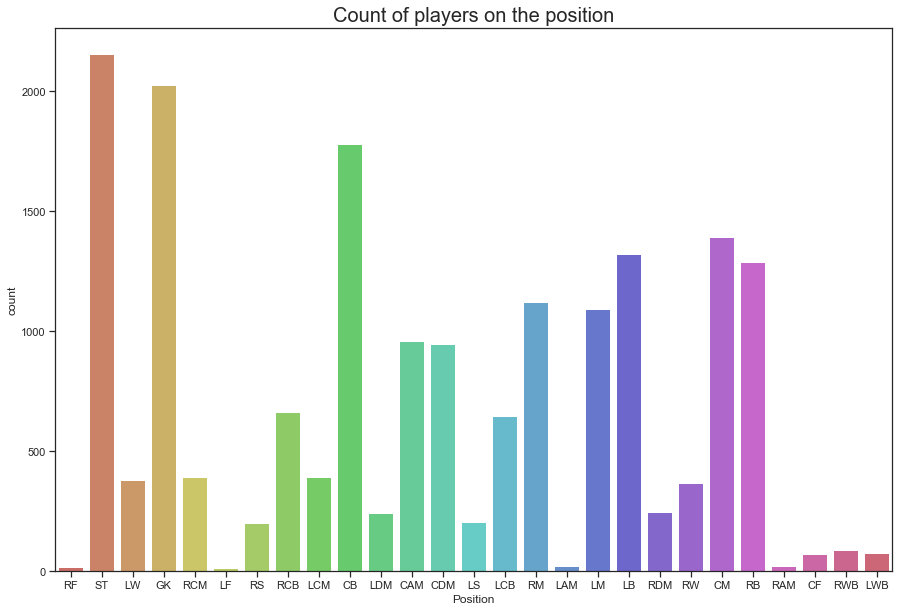

In [55]:
# All of position
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x = 'Position', data = fifa, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

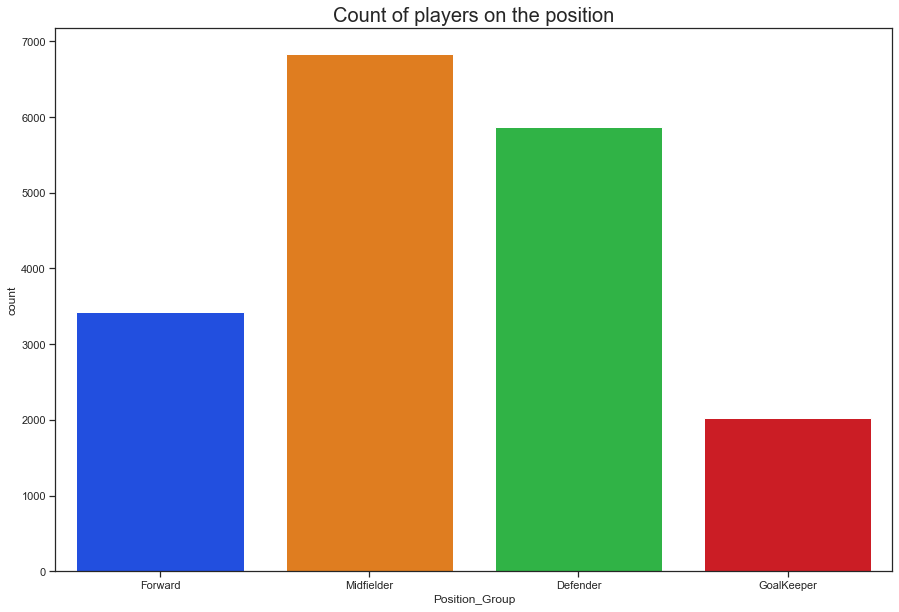

In [56]:
# All of position
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x = 'Position_Group', data = fifa,
                   order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'])

ax.set_title(label='Count of players on the position', fontsize=20);

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



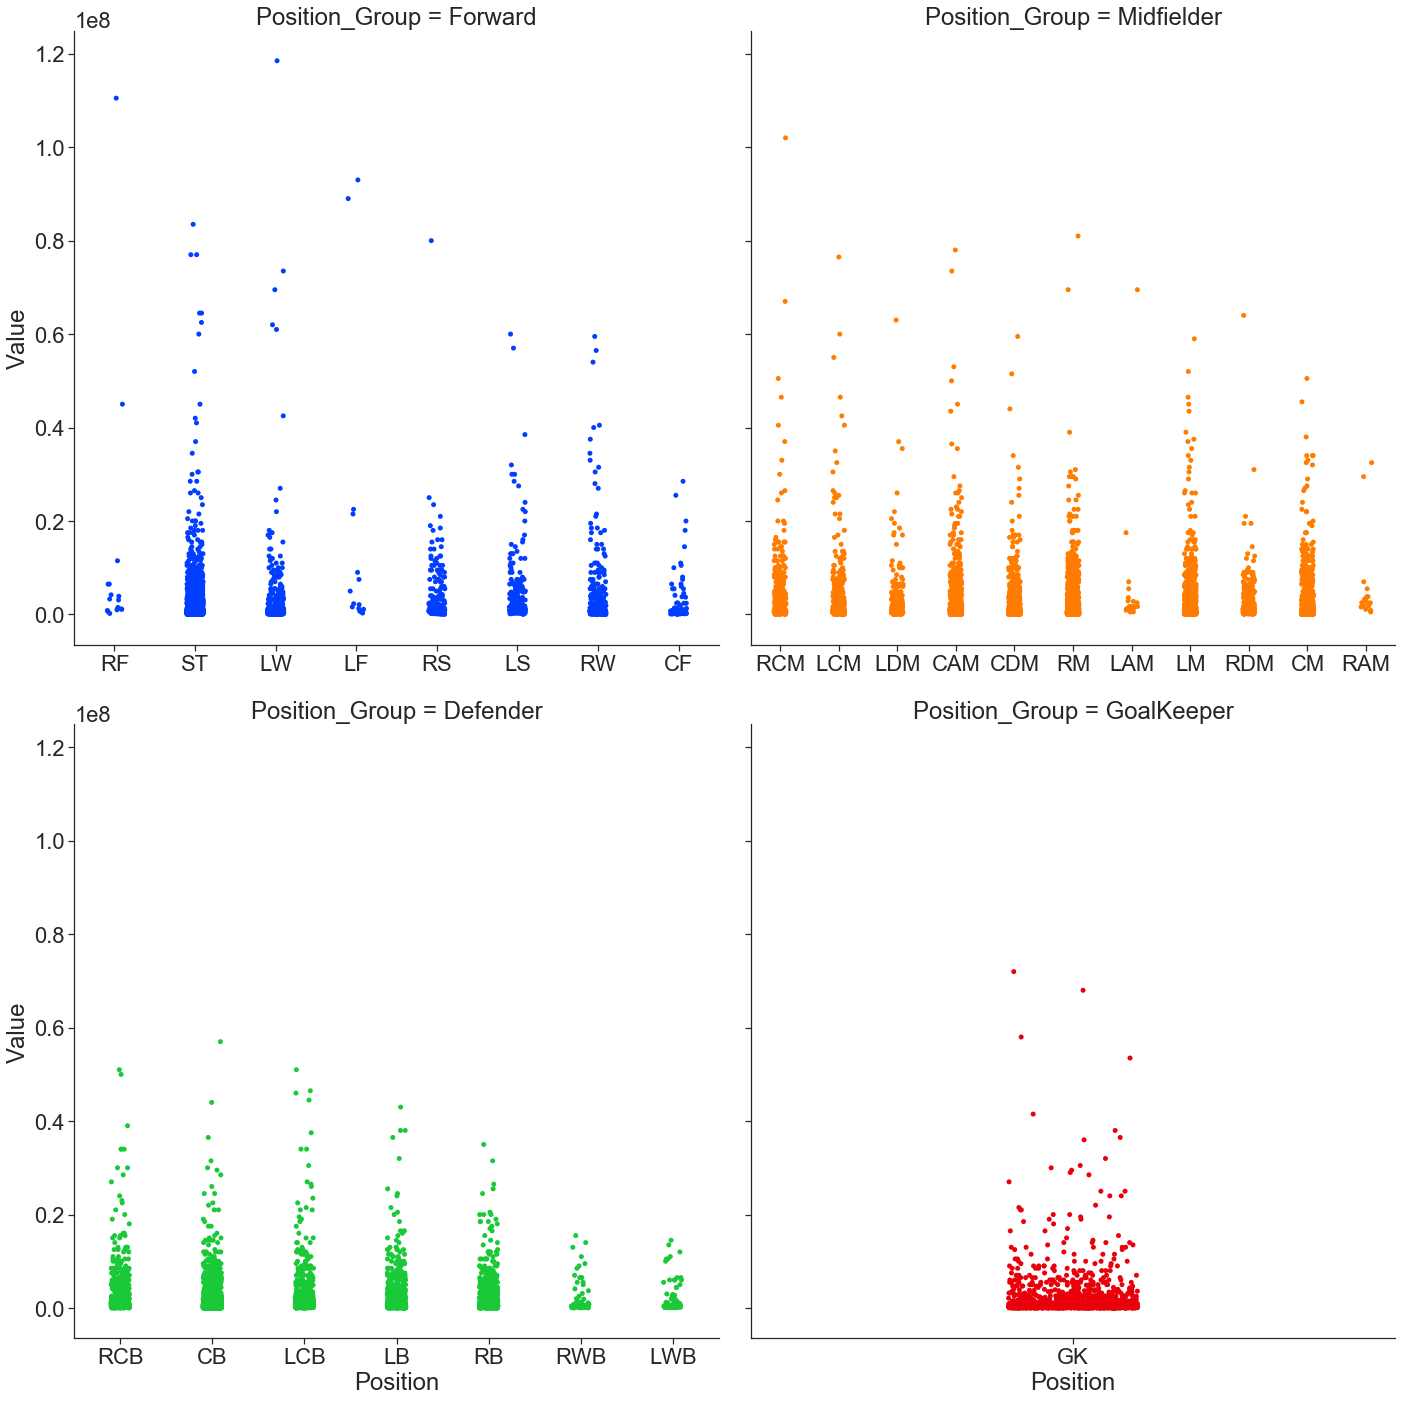

In [57]:
sns.set(font_scale=2, style ="ticks", palette = 'bright', color_codes=True)

g = sns.FacetGrid(fifa, col="Position_Group", hue = 'Position_Group',
                  hue_order= ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'],
                  col_order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper']
                  ,sharex=False, sharey=True, col_wrap=2, height=10)

g.map(sns.stripplot, 'Position' ,"Value" )

sns.set(font_scale=1, style ="ticks", palette = 'bright', color_codes=True)

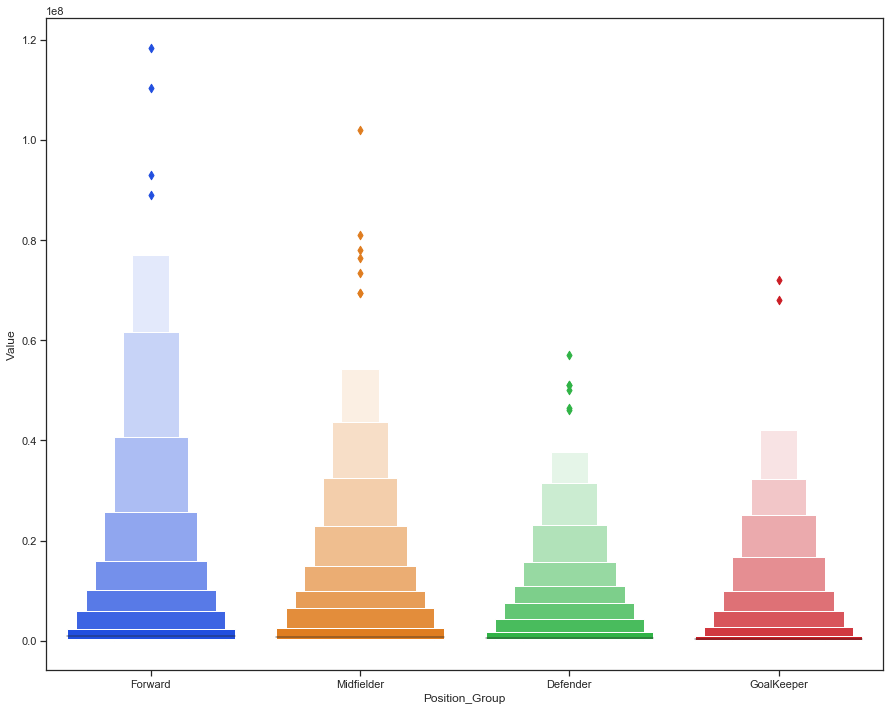

In [58]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 12))

ax = sns.boxenplot(x= 'Position_Group', y= 'Value', data = fifa, scale = 'linear',
            order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'])


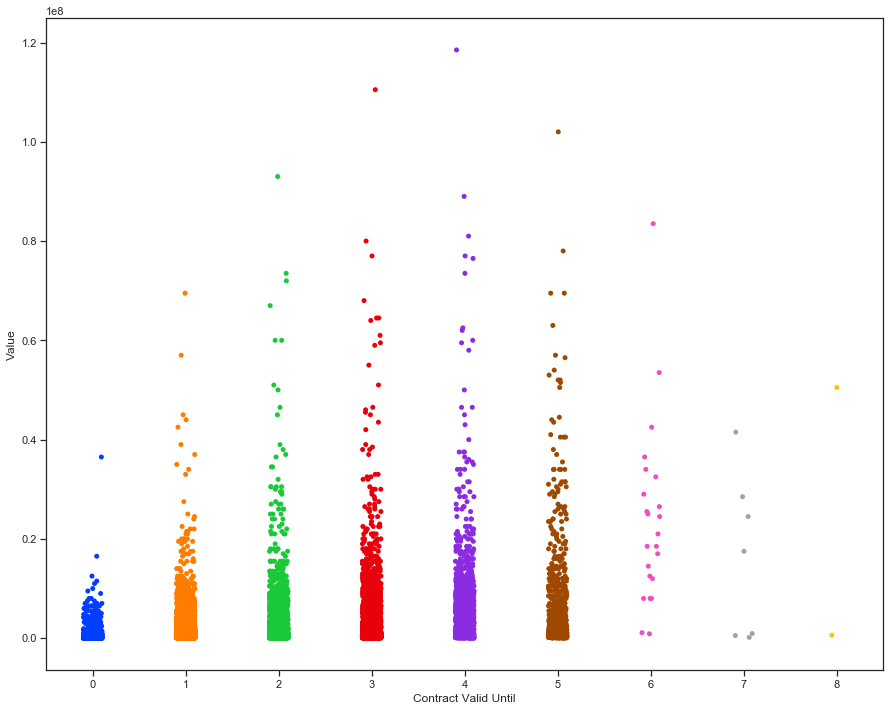

In [59]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 12))


ax = sns.stripplot('Contract Valid Until','Value', data = fifa)

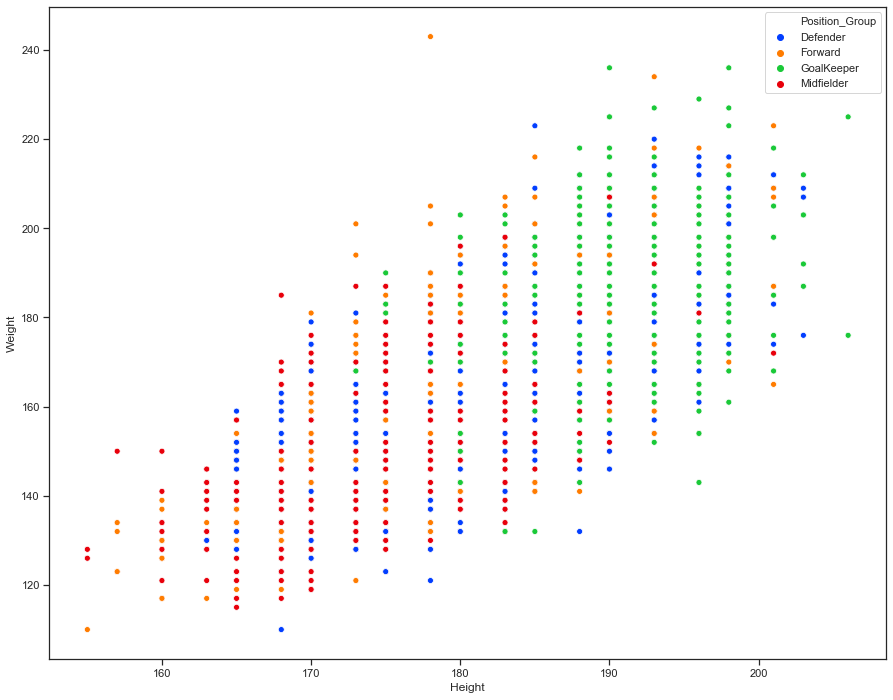

In [60]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 12))


ax = sns.scatterplot('Height','Weight', hue = 'Position_Group', data = fifa)

## Correlation/Relationship Analysis

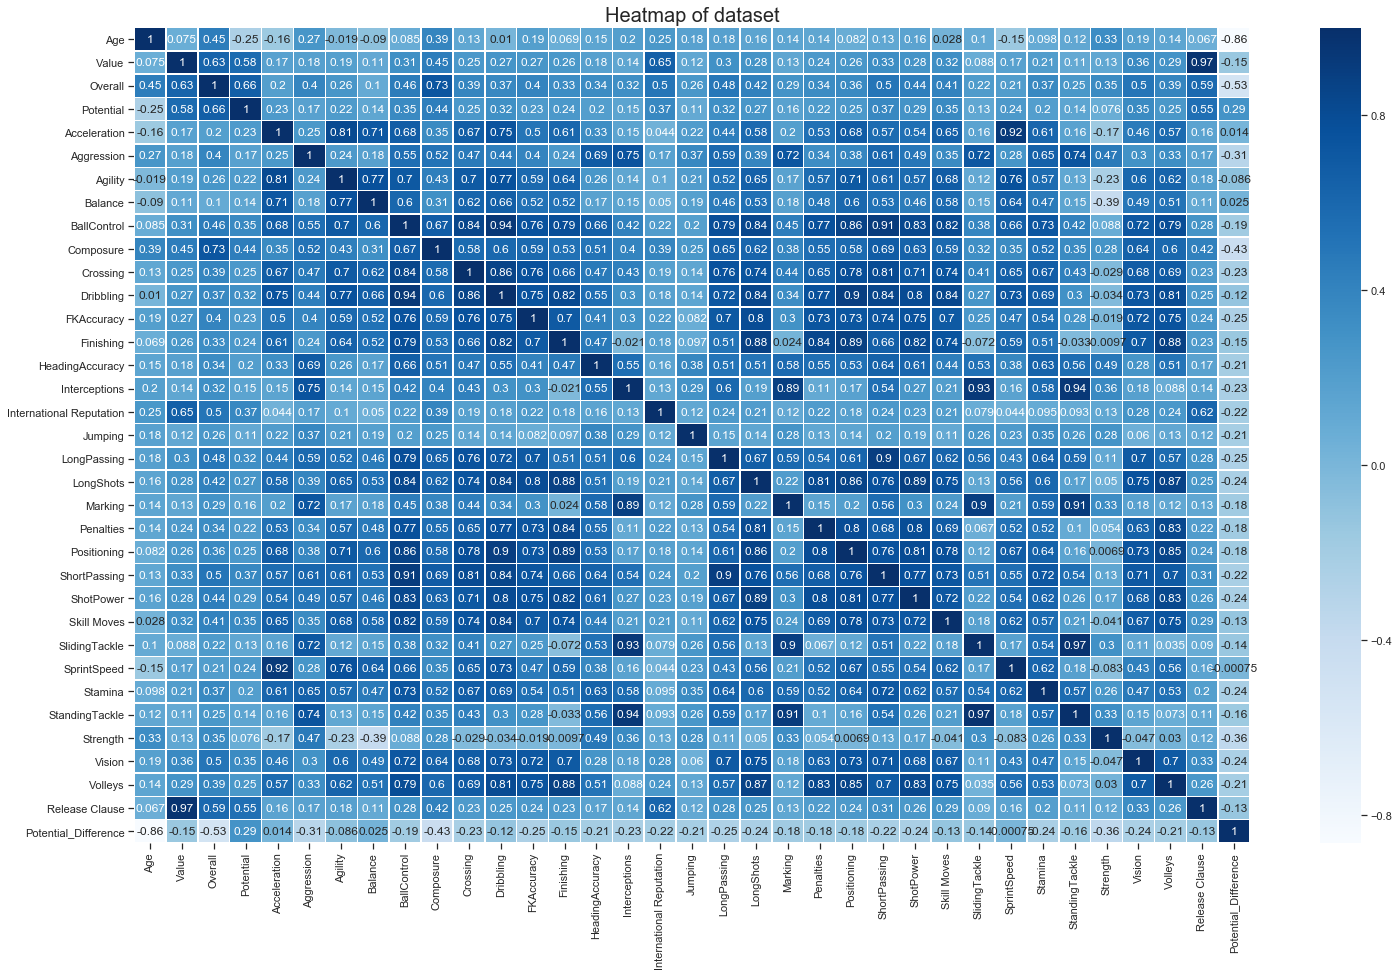

In [61]:
# Correlation heatmap
#plt.rcParams['figure.figsize']=(25,16)

f, ax = plt.subplots(figsize=(25, 15))

hm=sns.heatmap(fifa[['Age', 'Value', 'Overall', 'Potential',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys', 'Release Clause', 'Potential_Difference']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

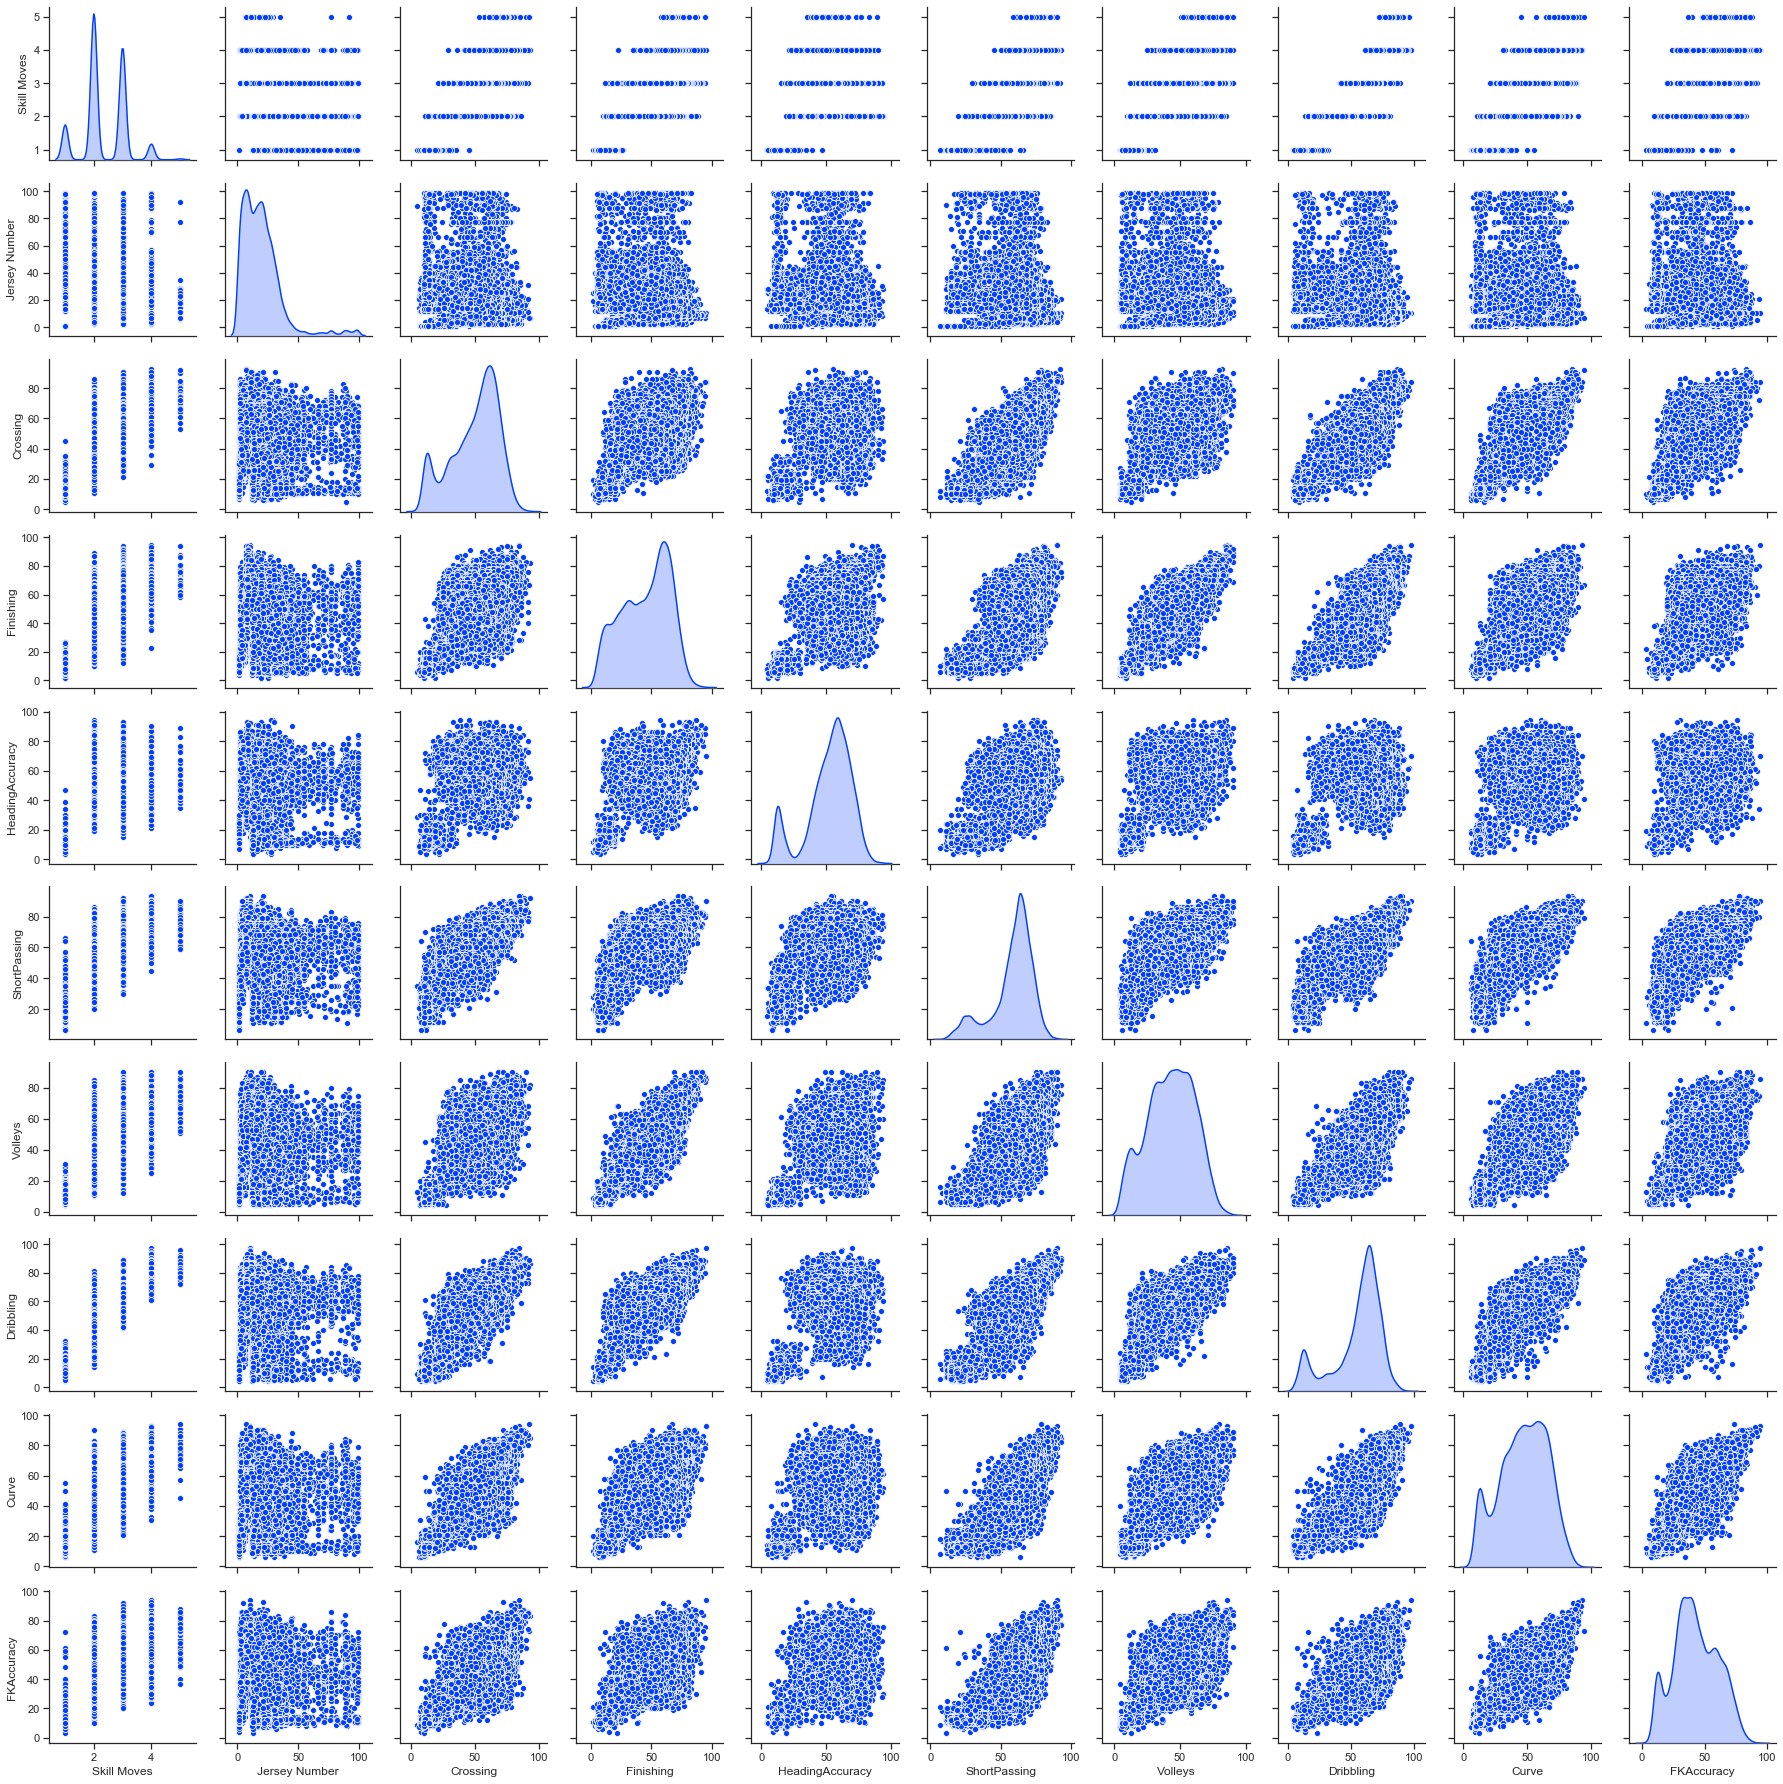

In [62]:
numeric_cols = list(fifa.dtypes[fifa.dtypes == 'float64'].index)

sns.pairplot(data = fifa.loc[:,numeric_cols[4:14]], diag_kind="kde")

## Predicting Value & Wage

In [63]:
fifa.head()

ID               Name  Age Nationality  Overall  Potential  \
0   0           L. Messi   31   Argentina       94         94   
1   1  Cristiano Ronaldo   33    Portugal       94         94   
2   2          Neymar Jr   26      Brazil       92         93   
3   3             De Gea   27       Spain       91         93   
4   4       K. De Bruyne   27     Belgium       91         92   

                  Club        Value      Wage  Special  Preferred Foot  \
0         FC Barcelona  110500000.0  565000.0     2202               0   
1             Juventus   77000000.0  405000.0     2228               1   
2  Paris Saint-Germain  118500000.0  290000.0     2143               1   
3    Manchester United   72000000.0  260000.0     1471               1   
4      Manchester City  102000000.0  355000.0     2281               1   

   International Reputation  Weak Foot  Skill Moves Body Type  Real Face  \
0                       5.0        4.0          4.0      Lean          1   
1                       5.0        4.0          5.0    Normal          1   
2                       5.0        5.0          5.0      Lean          1   
3                       4.0        3.0          1.0      Lean          1   
4                       4.0        5.0          4.0    Normal          1   

  Position  Jersey Number  Joined  Loaned From  Contract Valid Until  Height  \
0       RF           10.0    5297            0                     3     170   
1       ST            7.0     175            0                     4     188   
2       LW           10.0     516            0                     4     175   
3       GK            1.0    2741            0                     2     193   
4      RCM            7.0    1220            0                     5     180   

   Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  \
0     159  88  88  88  92  93  93  93  92   93   93   93  91   84  84   84   
1     183  91  91  91  89  90  90  90  89   88   88   88  88   81  81   81   
2     150  84  84  84  89  89  89  89  89   89   89   89  88   81  81   81   
3     168   0   0   0   0   0   0   0   0    0    0    0   0    0   0    0   
4     154  82  82  82  87  87  87  87  87   88   88   88  88   87  87   87   

   RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  \
0  91   64   61   61   61   64  59   47  47   47  59      84.0       95.0   
1  88   65   61   61   61   65  61   53  53   53  61      84.0       94.0   
2  88   65   60   60   60   65  60   47  47   47  60      79.0       87.0   
3   0    0    0    0    0    0   0    0   0    0   0      17.0       13.0   
4  88   77   77   77   77   77  73   66  66   66  73      93.0       82.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
3             21.0          50.0     13.0       18.0   21.0        19.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
3         51.0         42.0          57.0         58.0     60.0       90.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0     95.0       85.0     68.0     72.0      59.0       94.0        48.0   
1     70.0       95.0     95.0     88.0      79.0       93.0        63.0   
2     84.0       80.0     61.0     81.0      49.0       82.0        56.0   
3     43.0       31.0     67.0     43.0      64.0       12.0        38.0 

In [64]:
#DROP these columns first
drop_cols = ['ID', 'Name','Nationality','Club']
numeric_cols = list(fifa.dtypes[(fifa.dtypes == 'float64')|(fifa.dtypes == 'int64')].index)

#Dummy Predictors
fifa_dumm_cols = fifa.loc[:, ['Position', 'Continent', 'Position_Group']]

#Ordinal Predictors
fifa_ordinal_cols = fifa.loc[:, ['Body Type', 'Attack_WR', 'Defense_WR']]

#Numerical Predictors
fifa_numeric_cols = fifa[numeric_cols]
fifa_numeric_cols = fifa_numeric_cols.drop(['ID', 'Wage','Value','Release Clause'], axis = 1)

In [65]:
#Getting dummy dataframe for nominal variables
dummy_df = pd.get_dummies(fifa_dumm_cols)

#Mapping ordinal column values
b_type_map = {"Lean": 1, "Normal": 2, "Stocky": 3}
wr_map = {"Low": 1, "Medium": 2, "High": 3}

fifa_ordinal_cols['Body Type'] = fifa_ordinal_cols['Body Type'].map(b_type_map)
fifa_ordinal_cols['Attack_WR'] = fifa_ordinal_cols['Attack_WR'].map(wr_map)
fifa_ordinal_cols['Defense_WR'] = fifa_ordinal_cols['Defense_WR'].map(wr_map)

In [66]:
print(fifa_ordinal_cols.shape)
print(dummy_df.shape)
print(fifa_numeric_cols.shape)

(18159, 3)
(18159, 37)
(18159, 85)


In [67]:
predictors_df = pd.concat([fifa_numeric_cols,fifa_ordinal_cols, dummy_df], axis=1) 

target_val = fifa.Value

target_wage = fifa.Wage

In [68]:
predictors_df.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Jersey Number  Joined  Loaned From  \
0        4.0          4.0          1           10.0    5297            0   
1        4.0          5.0          1            7.0     175            0   
2        5.0          5.0          1           10.0     516            0   
3        3.0          1.0          1            1.0    2741            0   
4        5.0          4.0          1            7.0    1220            0   

   Contract Valid Until  Height  Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  \
0                     3     170     159  88  88  88  92  93  93  93  92   93   
1                     4     188     183  91  91  91  89  90  90  90  89   88   
2                     4     175     150  84  84  84  89  89  89  89  89   89   
3                     2     193     168   0   0   0   0   0   0   0   0    0   
4                     5     180     154  82  82  82  87  87  87  87  87   88   

   CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  \
0   93   93  91   84  84   84  91   64   61   61   61   64  59   47  47   47   
1   88   88  88   81  81   81  88   65   61   61   61   65  61   53  53   53   
2   89   89  88   81  81   81  88   65   60   60   60   65  60   47  47   47   
3    0    0   0    0   0    0   0    0    0    0    0    0   0    0   0    0   
4   88   88  88   87  87   87  88   77   77   77   77   77  73   66  66   66   

   RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0  59      84.0       95.0             70.0          90.0     86.0       97.0   
1  61      84.0       94.0             89.0          81.0     87.0       88.0   
2  60      79.0       87.0             62.0          84.0     84.0       96.0   
3   0      17.0       13.0             21.0          50.0     13.0       18.0   
4  73      93.0       82.0             55.0          92.0     82.0       86.0   

   Curve  FKAccuracy  LongPassing  ...  Club_Reputation  Position_Potential  \
0   93.0        94.0         87.0  ...         2.242424                   2   
1   81.0        76.0         77.0  ...         2.520000                   3   
2   88.0        87.0         78.0  ...         2.233333                   3   
3   21.0        19.0         51.0  ...         2.090909                   0   
4   85.0        83.0         91.0  ...         2.090909                   3   

   Attacking  Skill  Movement  Power  Mentality  Defending  GoalKeeping  \
0       85.0   93.4      91.6   75.6  71.500000  29.000000         10.8   
1       87.0   83.2      86.6   90.0  74.833333  27.333333         11.6   
2       79.2   88.8      91.6   70.6  73.833333  28.000000         11.8   
3       22.8   30.2      61.6   43.4  42.666667  16.333333         88.8   
4       80.8   87.2      80.2   82.0  80.833333  59.000000         11.2   

   Potential_Difference  Body Type  Attack_WR  Defense_WR  Position_CAM  \
0                     0          1          2           2             0   
1                     0          2          3           1             0   
2                     1          1          3           2             0   
3                     2          1          2           2             0   
4                     1          2          3           3             0   

   Position_CB  Position_CDM  Position_CF  Position_CM  Position_GK  \
0            0             0            0            0            0   
1            0             0            0            0            0   
2            0      

**Linear Regression**

In [69]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [70]:
# with sklearn
lre = LinearRegression()
lre.fit(predictors_df, target_val)

print('Intercept: \n', lre.intercept_)
print('Coefficients: \n', lre.coef_)

model = sm.OLS(target_val, predictors_df).fit()
predictions = model.predict(predictors_df) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 4579652362755.395
Coefficients: 
 [-3.56152821e+05 -8.97181629e+16  8.97181629e+16 -4.17920959e+04
 -4.41330189e+04  3.42400567e+06  8.13557571e+04  1.11809231e+05
  1.01362580e+06 -1.00760000e+04  2.32000000e+02  3.52413281e+04
  2.65129500e+05 -5.70300000e+03  1.36800000e+03  5.47049113e+13
  8.67902055e+13 -1.41495117e+14  8.20078383e+14  2.24045195e+13
 -8.42294008e+13  6.18248815e+13 -8.20078383e+14 -2.49620149e+15
  1.14455472e+15  1.35164677e+15 -5.23355343e+14  9.10699581e+12
 -2.95798306e+12 -6.14901276e+12  5.23355343e+14 -4.02202045e+14
 -5.89286597e+13  5.72287297e+13  1.69993000e+12  4.02202045e+14
 -1.51978533e+13 -4.16374469e+14  2.34789796e+14  1.81584673e+14
  1.51978532e+13  2.18164761e+14  2.18164761e+14  2.18164761e+14
  2.18164761e+14  2.18164761e+14  7.44761327e+14  7.44761327e+14
  7.44761327e+14  7.44761327e+14  7.44761327e+14  2.07990455e+13
  2.07990455e+13  2.07990455e+13  2.07990455e+13  2.07990455e+13
  8.04203391e+13  8.04203391e+13  8.0420339

In [71]:
pd.DataFrame(model.params, columns = ['Coefficients']).sort_values(by= 'Coefficients', ascending = False)

Coefficients
Position_Potential         6.498542e+06
Club_Reputation            4.944524e+06
Position_LF                4.230000e+06
International Reputation   3.418787e+06
Position_RF                1.051158e+06
Real Face                  1.020903e+06
Overall                    2.649380e+05
Contract Valid Until       2.649043e+05
Defense_WR                 2.229956e+05
Skill Moves                1.311718e+05
Attack_WR                  1.177454e+05
Potential                  7.971763e+04
Weak Foot                  7.199451e+04
Reactions                  7.091151e+04
StandingTackle             6.180445e+04
Stamina                    5.818873e+04
FKAccuracy                 5.401156e+04
Finishing                  5.200372e+04
Interceptions              5.066026e+04
Vision                     4.950334e+04
LongPassing                4.573099e+04
Defending                  4.498986e+04
Marking                    4.449269e+04
Strength                   4.279469e+04
HeadingAccuracy            4.225526e+04
Aggression                 4.157661e+04
Movement                   4.054121e+04
Positioning                3.989386e+04
Attacking                  3.862296e+04
Balance                    3.837935e+04
ShortPassing               3.686476e+04
Volleys                    3.682318e+04
Power                      3.679804e+04
Acceleration               3.555218e+04
Loaned From                3.510054e+04
Skill                      3.343969e+04
Mentality                  3.314843e+04
LF                         3.296238e+04
CF                         3.296238e+04
RF                         3.296238e+04
Jumping                    3.193265e+04
LongShots                  3.185555e+04
GKKicking                  3.137308e+04
SprintSpeed                2.987528e+04
SlidingTackle              2.867243e+04
Curve                      2.829315e+04
LM                         2.823507e+04
RM                         2.823507e+04
Agility                    2.798771e+04
Crossing                   2.516787e+04
...                                 ...
LS                        -1.565088e+04
RS                        -1.565088e+04
ST                        -1.565088e+04
RB                        -1.772535e+04
LB                        -1.772535e+04
LCB                       -3.101801e+04
RCB                       -3.101801e+04
CB                        -3.101801e+04
Preferred Foot            -3.155781e+04
RAM                       -3.852668e+04
CAM                       -3.852668e+04
LAM                       -3.852668e+04
Special                   -4.184332e+04
Potential_Difference      -1.852204e+05
Age                       -3.435882e+05
Position_LAM              -1.137855e+06
Position_LCM              -1.327664e+06
Position_RCM              -1.386946e+06
Position_LDM              -1.672332e+06
Position_CM               -1.696563e+06
Position_RDM              -1.715467e+06
Position_CDM              -1.967052e+06
Position_RAM              -2.010399e+06
Position_CAM              -2.161710e+06
Position_RM               -2.164934e+06
Position_LM               -2.216396e+06
Position_RWB              -2.338896e+06
Position_LCB              -2.391622e+06
Position_LWB              -2.628786e+06
Position_RCB              -2.638728e+06
Position_CB               -2.670618e+06
Position_LB               -2.960685e+06
Position_RB               -2.991830e+06
Position_LS               -3.333847e+06
Position_LW               -3.671922e+06
Position_RS               -3.837544e+06
Position_RW               -3.868806e+06
Position_ST               -4.028128e+06
Position_CF               -4.266379e+06
Position_GK               -4.498291e+06
Position_Group_GoalKeeper -4.498291e+06
Continent_South America   -9.786863e+06
Continent_Oceania         -9.847068e+06
Continent_Asia            -1.001135e+07
Continent_Europe          -1.005272e+07
Continent_Africa          -1.024356e+07
Continent_North America   -1.036068e+07
Position_Group_Forward    -1.772547e+07
Position_Group_Defender   -

## Baseline models and feature importance for Value prediction
### Splitting data (stratified)

In [72]:
target_val.max()

118500000.0

In [73]:
target_val.describe()

count    1.815900e+04
mean     2.416131e+06
std      5.601319e+06
min      0.000000e+00
25%      3.000000e+05
50%      6.750000e+05
75%      2.000000e+06
max      1.185000e+08
Name: Value, dtype: float64

In [74]:
bins = np.linspace(target_val.min(),target_val.max(), 5)

In [75]:
bins = bins[:4]

In [76]:
y_binned = np.digitize(target_val, bins)
pd.Series(y_binned).value_counts()

1    18013
2      114
3       27
4        5
dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
train_predictors_val, test_predictors_val, train_target_val, test_target_val = train_test_split(predictors_df,
                                                                                                target_val,
                                                                                                test_size=0.2,
                                                                                                stratify=y_binned)

In [78]:
train_target_val.describe()

count    1.452700e+04
mean     2.415348e+06
std      5.624657e+06
min      0.000000e+00
25%      3.000000e+05
50%      6.750000e+05
75%      2.000000e+06
max      1.185000e+08
Name: Value, dtype: float64

In [79]:
test_target_val.describe()

count    3.632000e+03
mean     2.419265e+06
std      5.507751e+06
min      0.000000e+00
25%      3.000000e+05
50%      7.000000e+05
75%      2.200000e+06
max      1.020000e+08
Name: Value, dtype: float64

(array([1.3958e+04, 3.8500e+02, 1.1000e+02, 3.4000e+01, 1.4000e+01,
        1.3000e+01, 8.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.0000e+00, 1.1850e+07, 2.3700e+07, 3.5550e+07, 4.7400e+07,
        5.9250e+07, 7.1100e+07, 8.2950e+07, 9.4800e+07, 1.0665e+08,
        1.1850e+08]),
 <a list of 10 Patch objects>)

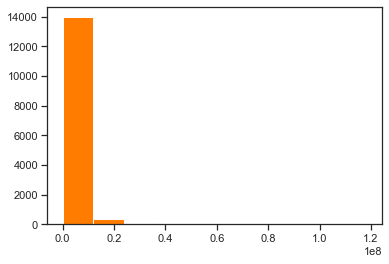

In [80]:
plt.hist(test_target_val)
plt.hist(train_target_val)

### Baseline models

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_predictors_val = scaler.fit_transform(train_predictors_val)
test_predictors_val = scaler.transform(test_predictors_val)

In [82]:
import sklearn.model_selection as cv
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score, LeaveOneOut

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression

dtc=DecisionTreeRegressor()
rfr=RandomForestRegressor()
xbr=xgb.XGBRegressor()
lre=LinearRegression()

models = [dtc,rfr,xbr,lre]

for mod in models:
    mod.fit(train_predictors_val, train_target_val)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[21:13:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [83]:
test_error = []

# Sequentially fit all models and calculate test score
for mod in models:
    y_pred = mod.predict(test_predictors_val)
    mse_mod = MSE(test_target_val, y_pred)
    rmse_mod = mse_mod**(1/2)
    test_error.append(rmse_mod)

In [84]:
cv_error=[]

for mod in models:
    MSE_cv_error = -cross_val_score(mod, train_predictors_val,
                                    train_target_val, scoring='neg_mean_squared_error', n_jobs=-1)
    RMSE_cv = (MSE_cv_error.mean())**(1/2)
    cv_error.append(RMSE_cv)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



In [85]:
train_error=[]

# Sequentially fit all models and calculate train score
for mod in models:
    y_pred = mod.predict(train_predictors_val)
    mse_mod = MSE(train_target_val, y_pred)
    rmse_mod = mse_mod**(1/2)
    train_error.append(rmse_mod)

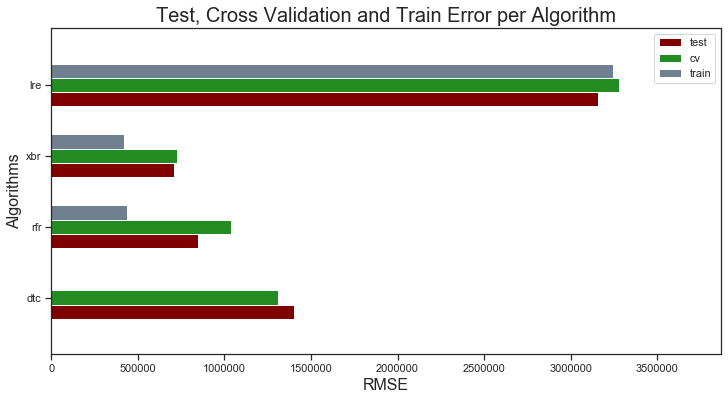

In [86]:
model_names = ['dtc','rfr','xbr','lre']

error = pd.DataFrame(dict(graph=model_names,test_error=test_error, cv_error=cv_error, train_error=train_error)) 
#error = pd.DataFrame(dict(graph=model_names,test_error=test_error, train_error=train_error)) 

ind = np.arange(len(error))
width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
ax.barh(ind, error.test_error, width, color='maroon', label='test')
ax.barh(ind + width, error.cv_error, width, color='forestgreen', label='cv')
ax.barh(ind + 2*width, error.train_error, width, color='slategrey', label='train')
ax.set_xlim(0, max(error.test_error)+min(error.test_error))
plt.xlabel('RMSE', fontsize=16)
plt.ylabel('Algorithms', fontsize=16)
plt.title('Test, Cross Validation and Train Error per Algorithm',fontsize=20)

ax.set(yticks=ind + width, yticklabels=error.graph, ylim=[2*width - 1, len(error)])
ax.legend()

plt.show()


In [87]:
error

graph    test_error      cv_error   train_error
0   dtc  1.402753e+06  1.308832e+06  0.000000e+00
1   rfr  8.500290e+05  1.035548e+06  4.356985e+05
2   xbr  7.082398e+05  7.283133e+05  4.179605e+05
3   lre  3.158620e+06  3.276584e+06  3.243146e+06

Next, finding the most important features.

### Feature importance

In [88]:
n_feats=predictors_df.shape[1]
col_names=pd.DataFrame(np.array(predictors_df.columns))

In [89]:
cv_score_features=pd.DataFrame()
best_models=[dtc,rfr,xbr,lre]
index=0

for mod in best_models:
    score_list=[]
    index+=1
    for i in range(n_feats):
        X_feature = pd.DataFrame(np.array(predictors_df.iloc[:, i]).reshape(-1,1))
        scores = -cross_val_score(mod, X_feature, target_val, scoring='neg_mean_squared_error', n_jobs=-1)
        score_list.append(scores.mean())
    cv_score_features[str(index)]=score_list

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



Interpretation: In this case, a higher value (RMSE) is equal to less explanatory power of the respective feature.

In [90]:
s = {'Feature': col_names[0], 'DTC': cv_score_features['1'], 'RFR': cv_score_features['2'], 'XBR': cv_score_features['3'], 'LRE': cv_score_features['4']}
feature_scores=pd.DataFrame(data=s)
feature_scores=feature_scores.sort_values(by=['RFR'])
feature_scores

Feature           DTC           RFR           XBR  \
1                      Overall  3.291131e+13  3.291231e+13  3.291657e+13   
50                 BallControl  3.363363e+13  3.361704e+13  3.359435e+13   
22                          RW  3.404289e+13  3.405285e+13  3.403353e+13   
18                          LW  3.404289e+13  3.417434e+13  3.403353e+13   
25                         RAM  3.503860e+13  3.482337e+13  3.501742e+13   
24                         CAM  3.503860e+13  3.485815e+13  3.501742e+13   
26                          LM  3.523238e+13  3.492148e+13  3.521924e+13   
20                          CF  3.510001e+13  3.495542e+13  3.507277e+13   
19                          LF  3.510001e+13  3.498650e+13  3.507277e+13   
23                         LAM  3.503860e+13  3.498932e+13  3.501742e+13   
21                          RF  3.510001e+13  3.500580e+13  3.507277e+13   
30                          RM  3.523238e+13  3.503626e+13  3.521924e+13   
2                    Potential  3.532868e+13  3.534682e+13  3.533525e+13   
44                ShortPassing  3.530417e+13  3.545687e+13  3.527164e+13   
46                   Dribbling  3.547305e+13  3.551022e+13  3.541716e+13   
54                   Reactions  3.568605e+13  3.569504e+13  3.574151e+13   
29                         RCM  3.646782e+13  3.579999e+13  3.643896e+13   
27                         LCM  3.646782e+13  3.583584e+13  3.643896e+13   
17                          RS  3.587456e+13  3.589711e+13  3.586294e+13   
16                          ST  3.587456e+13  3.591125e+13  3.586294e+13   
15                          LS  3.587456e+13  3.593325e+13  3.586294e+13   
28                          CM  3.646782e+13  3.610455e+13  3.643896e+13   
64                      Vision  3.646856e+13  3.634947e+13  3.641733e+13   
66                   Composure  3.667634e+13  3.658744e+13  3.661637e+13   
77                   Attacking  3.718240e+13  3.688568e+13  3.665597e+13   
5     International Reputation  3.712385e+13  3.710340e+13  3.712412e+13   
63                 Positioning  3.710834e+13  3.717979e+13  3.705036e+13   
49                 LongPassing  3.703052e+13  3.722616e+13  3.707486e+13   
60                   LongShots  3.730820e+13  3.732053e+13  3.729669e+13   
32                         LDM  3.725316e+13  3.746625e+13  3.726221e+13   
34                         RDM  3.725316e+13  3.772684e+13  3.726221e+13   
78                       Skill  3.761462e+13  3.773877e+13  3.691074e+13   
56                   ShotPower  3.774815e+13  3.777099e+13  3.769899e+13   
33                         CDM  3.725316e+13  3.783387e+13  3.726221e+13   
41                    Crossing  3.797931e+13  3.788784e+13  3.788268e+13   
45                     Volleys  3.795030e+13  3.793081e+13  3.792699e+13   
42                   Finishing  3.785361e+13  3.793108e+13  3.779046e+13   
40                          RB  3.803766e+13  3.799288e+13  3.803114e+13   
36                          LB  3.803766e+13  3.804232e+13  3.803114e+13   
47                       Curve  3.807209e+13  3.811535e+13  3.804161e+13   
35                         RWB  3.823767e+13  3.811965e+13  3.821822e+13   
31                         LWB  3.823767e+13  3.835674e+13  3.821822e+13   
7                  Skill Moves  3.846869e+13  3.848373e+13  3.846849e+13   
76          Position_Potential  3.859366e+13  3.855760e+13  3.859348e+13   
8                    Real Face  3.868142e+13  3.864619e+13  3.868123e+13   
62               Interceptions  3.894271e+13  3.903848e+13  3.881148e+13   
3                      Special  4.039301e+13  3.905265e+13  3.677384e+13   
48                  FKAccuracy  3.920840e+13  3.919917e+13  3.911572e+13   
43             HeadingAccuracy  3.919032e+13  3.920515e+13  3.906376e+13   
68              StandingTackle  3.923663e+13  3.927375e+13  3.916141e+13   
..                         ...           ...           ...           ...   
4               Preferred Foot  4.060673e+13  4.055553e+13  4.060644e+1

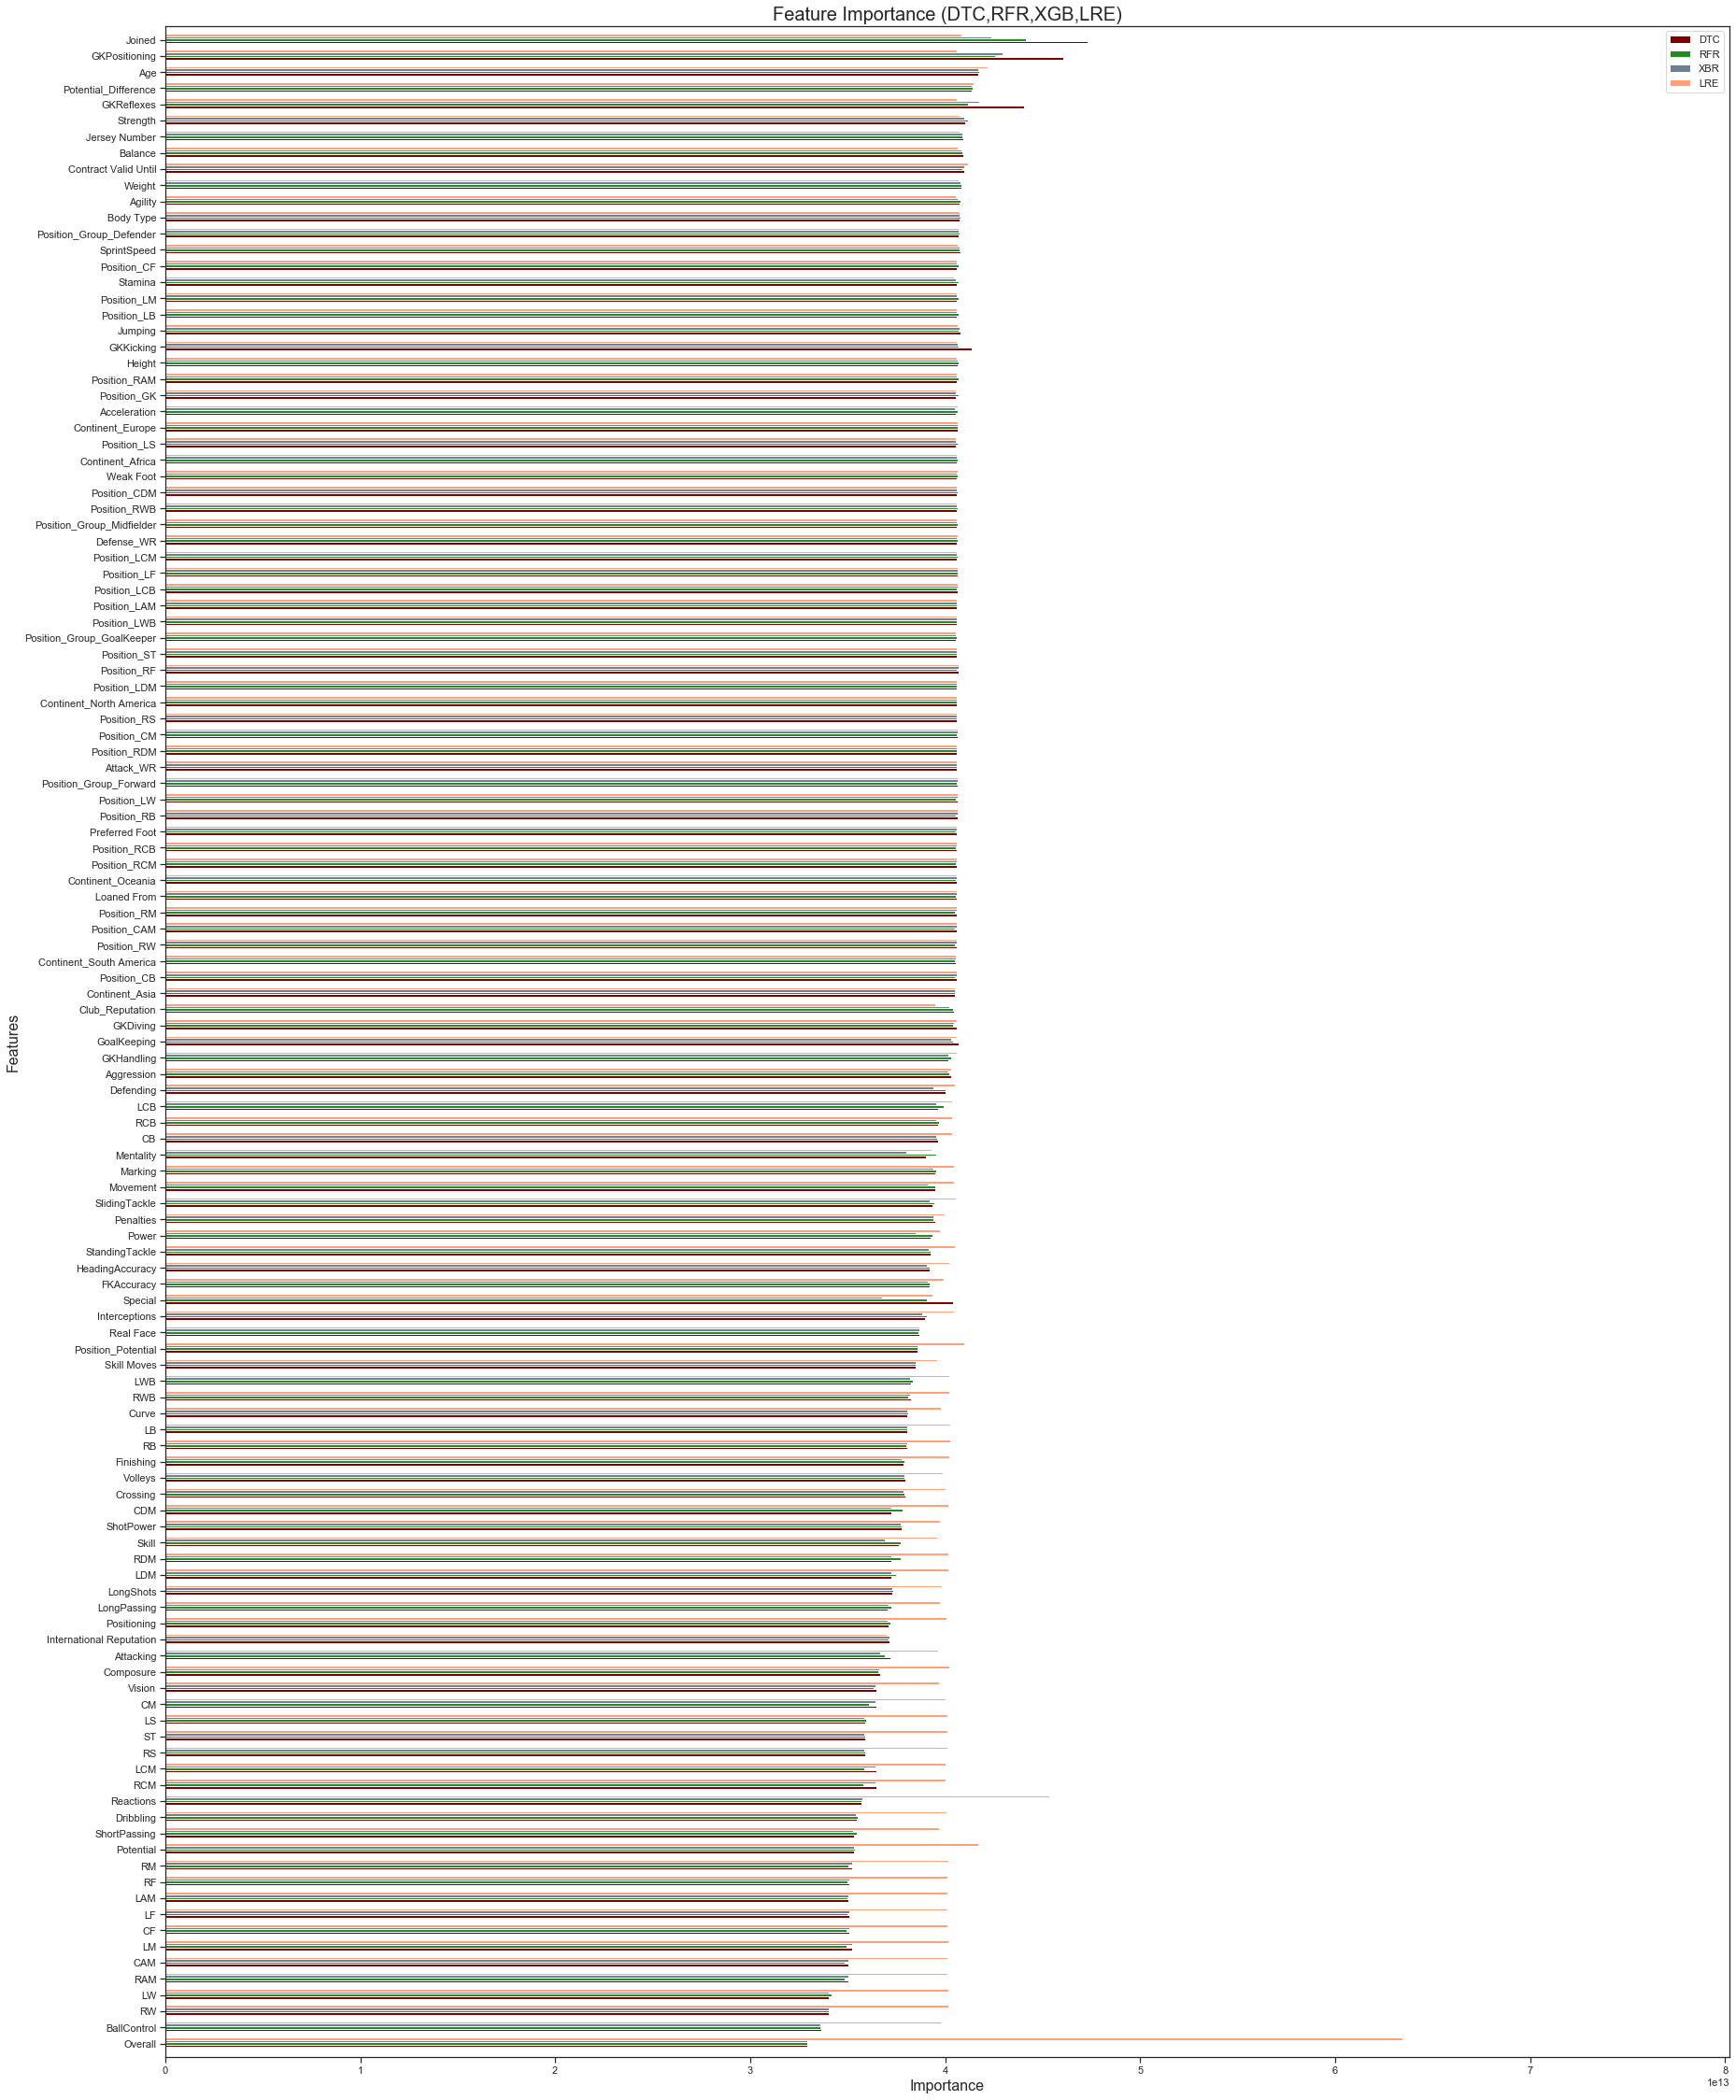

In [91]:
importance = pd.DataFrame(dict(graph=feature_scores['Feature'], DTC=feature_scores['DTC'], RFR=feature_scores['RFR'], XBR=feature_scores['XBR'],LRE=feature_scores['LRE'])) 

ind = np.arange(len(importance))
width = 0.15

fig, ax = plt.subplots(figsize=(30,40))
ax.barh(ind, importance.DTC, width, color='maroon', label='DTC')
ax.barh(ind + width, importance.RFR, width, color='forestgreen', label='RFR')
ax.barh(ind + 2*width, importance.XBR, width, color='slategrey', label='XBR')
ax.barh(ind + 3*width, importance.LRE, width, color='lightsalmon', label='LRE')
ax.set_xlim(0, max(importance.DTC)+min(importance.DTC))
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('Feature Importance (DTC,RFR,XGB,LRE)',fontsize=20)

ax.set(yticks=ind + width, yticklabels=importance.graph, ylim=[2*width - 1, len(importance)])
ax.legend()

plt.show()

### Feature reduction based on feature importance

Grouping position skills and drop:

In [92]:
predictors_df['Forward_Skill'] = predictors_df.loc[:,['LS',  'ST', 'RS',  'LW', 'LF', 'CF', 'RF', 'RW']].mean(axis=1)

predictors_df['Midfield_Skill'] = predictors_df.loc[:,['LAM','CAM','RAM', 'LM', 'LCM', 'CM' ,'RCM', 'RM','LDM', 'CDM', 'RDM']].mean(axis=1)

predictors_df['Defence_Skill'] = predictors_df.loc[:,['LWB','RWB', 'LB','LCB','CB','RCB','RB']].mean(axis=1)

predictors_df = predictors_df.drop(['LS',  'ST', 'RS',  'LW', 'LF', 'CF', 'RF', 'RW',
          'LAM','CAM','RAM', 'LM', 'LCM', 'CM' ,'RCM', 'RM','LDM', 'CDM', 'RDM',
          'LWB','RWB', 'LB','LCB','CB','RCB','RB'], axis = 1)

In [93]:
predictors_df=predictors_df.drop(['Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'], axis = 1)

In [94]:
predictors_df.shape

(18159, 68)

Checking feature importance after dropping duplicated and redundant features.

In [95]:
n_feats=predictors_df.shape[1]
col_names=pd.DataFrame(np.array(predictors_df.columns))

In [96]:
cv_score_features=pd.DataFrame()
best_models=[dtc,rfr,xbr,lre]
index=0

for mod in best_models:
    score_list=[]
    index+=1
    for i in range(n_feats):
        X_feature = pd.DataFrame(np.array(predictors_df.iloc[:, i]).reshape(-1,1))
        scores = -cross_val_score(mod, X_feature, target_val, scoring='neg_mean_squared_error', n_jobs=-1)
        score_list.append(scores.mean())
    cv_score_features[str(index)]=score_list

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



Interpretation: In this case, a higher value (RMSE) is equal to less explanatory power of the respective feature.

In [97]:
s = {'Feature': col_names[0], 'DTC': cv_score_features['1'], 'RFR': cv_score_features['2'], 'XBR': cv_score_features['3'], 'LRE': cv_score_features['4']}
feature_scores=pd.DataFrame(data=s)
feature_scores=feature_scores.sort_values(by=['RFR'])
feature_scores

Feature           DTC           RFR           XBR  \
1                     Overall  3.291131e+13  3.291326e+13  3.291657e+13   
66             Midfield_Skill  3.483528e+13  3.515460e+13  3.495862e+13   
2                   Potential  3.532868e+13  3.533595e+13  3.533525e+13   
65              Forward_Skill  3.587262e+13  3.549306e+13  3.550093e+13   
17                  Attacking  3.718240e+13  3.669676e+13  3.665597e+13   
5    International Reputation  3.712385e+13  3.703573e+13  3.712412e+13   
18                      Skill  3.761462e+13  3.740197e+13  3.691074e+13   
7                 Skill Moves  3.846869e+13  3.843100e+13  3.846849e+13   
16         Position_Potential  3.859366e+13  3.856378e+13  3.859348e+13   
21                  Mentality  3.901254e+13  3.860665e+13  3.798656e+13   
8                   Real Face  3.868142e+13  3.865843e+13  3.868123e+13   
20                      Power  3.926227e+13  3.920952e+13  3.847206e+13   
67              Defence_Skill  3.945089e+13  3.951743e+13  3.877477e+13   
19                   Movement  3.950834e+13  3.955436e+13  3.911419e+13   
3                     Special  4.039301e+13  3.989058e+13  3.677384e+13   
22                  Defending  4.000452e+13  4.021000e+13  3.941836e+13   
26                  Attack_WR  4.059741e+13  4.047027e+13  4.059711e+13   
23                GoalKeeping  4.070534e+13  4.048833e+13  4.029215e+13   
43               Position_LWB  4.058846e+13  4.049128e+13  4.058816e+13   
63  Position_Group_GoalKeeper  4.056619e+13  4.053920e+13  4.056590e+13   
36               Position_LCB  4.062844e+13  4.054438e+13  4.062815e+13   
64  Position_Group_Midfielder  4.057505e+13  4.055913e+13  4.057475e+13   
34               Position_LAM  4.057999e+13  4.056019e+13  4.057970e+13   
56             Continent_Asia  4.049309e+13  4.056119e+13  4.049280e+13   
30               Position_CDM  4.059848e+13  4.057149e+13  4.059818e+13   
4              Preferred Foot  4.060673e+13  4.057726e+13  4.060644e+13   
60    Continent_South America  4.055348e+13  4.057864e+13  4.055318e+13   
29                Position_CB  4.058014e+13  4.058000e+13  4.057984e+13   
50                Position_RM  4.058744e+13  4.058363e+13  4.058715e+13   
31                Position_CF  4.059545e+13  4.058933e+13  4.059516e+13   
62     Position_Group_Forward  4.063847e+13  4.059035e+13  4.063817e+13   
46               Position_RCB  4.061562e+13  4.059559e+13  4.061532e+13   
59          Continent_Oceania  4.058075e+13  4.059630e+13  4.058046e+13   
52                Position_RW  4.060816e+13  4.059865e+13  4.060786e+13   
54                Position_ST  4.059688e+13  4.060166e+13  4.059659e+13   
48               Position_RDM  4.058798e+13  4.060745e+13  4.058769e+13   
58    Continent_North America  4.061745e+13  4.060800e+13  4.061716e+13   
28               Position_CAM  4.058364e+13  4.060942e+13  4.058335e+13   
33                Position_GK  4.056619e+13  4.061233e+13  4.056590e+13   
6                   Weak Foot  4.060848e+13  4.061582e+13  4.060818e+13   
42                Position_LW  4.062130e+13  4.061678e+13  4.062100e+13   
38               Position_LDM  4.059742e+13  4.061810e+13  4.059713e+13   
39                Position_LF  4.063674e+13  4.062166e+13  4.063643e+13   
11                Loaned From  4.061036e+13  4.062314e+13  4.061006e+13   
55           Continent_Africa  4.060050e+13  4.062388e+13  4.060021e+13   
15            Club_Reputation  4.043025e+13  4.062493e+13  4.019410e+13   
27                 Defense_WR  4.059084e+13  4.062708e+13  4.059055e+13   
37               Position_LCM  4.060453e+13  4.063347e+13  4.060423e+13   
51                Position_RS  4.058024e+13  4.063449e+13  4.057994e+13   
41                Position_LS  4.056743e+13  4.063960e+13  4.056713e+13   
40                Position_LM  4.058558e+13  4.064946e+13  4.058528e+13   
44               Position_RAM  4.057549e+13  4.066152e+13  4.057520e+13   
47               Position_RCM  4.059857e+13  4.

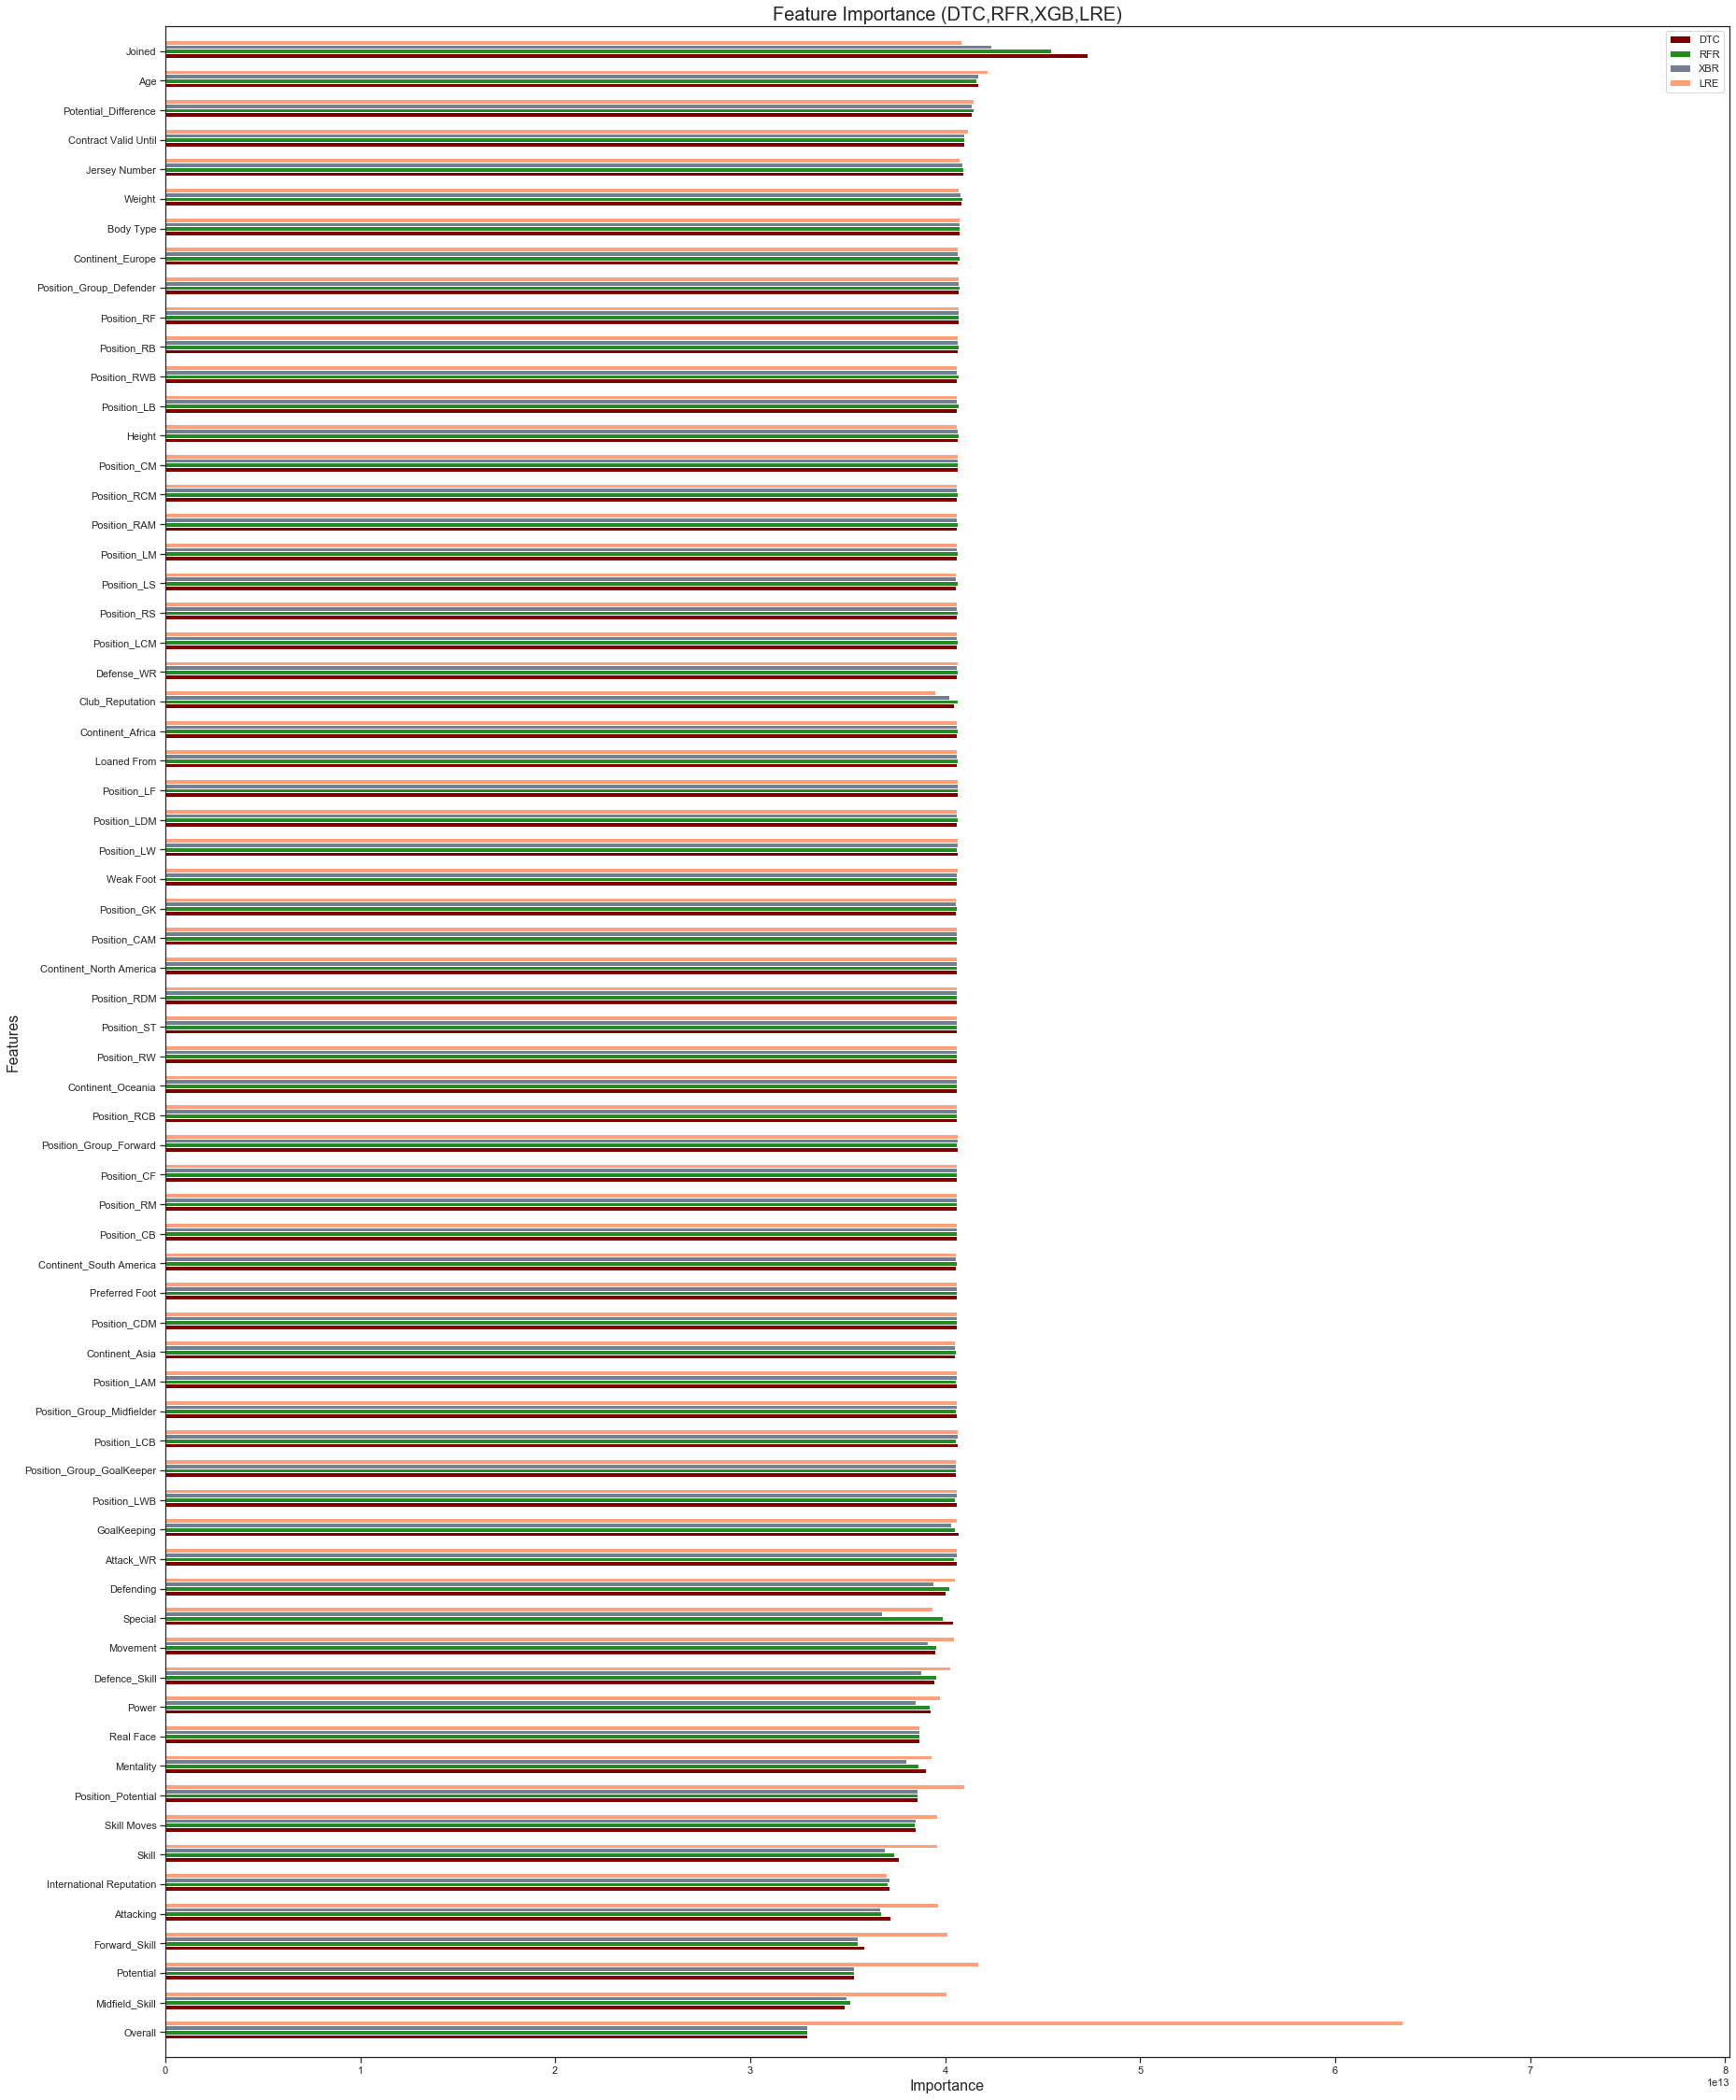

In [98]:
importance = pd.DataFrame(dict(graph=feature_scores['Feature'], DTC=feature_scores['DTC'], RFR=feature_scores['RFR'], XBR=feature_scores['XBR'],LRE=feature_scores['LRE'])) 

ind = np.arange(len(importance))
width = 0.15

fig, ax = plt.subplots(figsize=(30,40))
ax.barh(ind, importance.DTC, width, color='maroon', label='DTC')
ax.barh(ind + width, importance.RFR, width, color='forestgreen', label='RFR')
ax.barh(ind + 2*width, importance.XBR, width, color='slategrey', label='XBR')
ax.barh(ind + 3*width, importance.LRE, width, color='lightsalmon', label='LRE')
ax.set_xlim(0, max(importance.DTC)+min(importance.DTC))
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('Feature Importance (DTC,RFR,XGB,LRE)',fontsize=20)

ax.set(yticks=ind + width, yticklabels=importance.graph, ylim=[2*width - 1, len(importance)])
ax.legend()

plt.show()

Dropping position dummies:

In [99]:
predictors_df=predictors_df.drop(['Position_CAM', 'Position_CB', 'Position_CDM',
       'Position_CF', 'Position_CM', 'Position_GK', 'Position_LAM',
       'Position_LB', 'Position_LCB', 'Position_LCM', 'Position_LDM',
        'Position_LF', 'Position_LM', 'Position_LS', 'Position_LW',
        'Position_LWB', 'Position_RAM', 'Position_RB', 'Position_RCB',
        'Position_RCM', 'Position_RDM', 'Position_RF', 'Position_RM',
       'Position_RS', 'Position_RW', 'Position_RWB', 'Position_ST'], axis=1)

In [100]:
predictors_df.shape

(18159, 41)

Re-running feature importance:

In [101]:
n_feats=predictors_df.shape[1]
col_names=pd.DataFrame(np.array(predictors_df.columns))

In [102]:
cv_score_features=pd.DataFrame()
best_models=[dtc,rfr,xbr,lre]
index=0

for mod in best_models:
    score_list=[]
    index+=1
    for i in range(n_feats):
        X_feature = pd.DataFrame(np.array(predictors_df.iloc[:, i]).reshape(-1,1))
        scores = -cross_val_score(mod, X_feature, target_val, scoring='neg_mean_squared_error', n_jobs=-1)
        score_list.append(scores.mean())
    cv_score_features[str(index)]=score_list

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



Interpretation: In this case, a higher value (RMSE) is equal to less explanatory power of the respective feature.

In [103]:
s = {'Feature': col_names[0], 'DTC': cv_score_features['1'], 'RFR': cv_score_features['2'], 'XBR': cv_score_features['3'], 'LRE': cv_score_features['4']}
feature_scores=pd.DataFrame(data=s)
feature_scores=feature_scores.sort_values(by=['RFR'])
feature_scores

Feature           DTC           RFR           XBR  \
1                     Overall  3.291131e+13  3.288202e+13  3.291657e+13   
39             Midfield_Skill  3.483528e+13  3.537484e+13  3.495862e+13   
2                   Potential  3.532868e+13  3.537913e+13  3.533525e+13   
38              Forward_Skill  3.587262e+13  3.572715e+13  3.550093e+13   
18                      Skill  3.761462e+13  3.688433e+13  3.691074e+13   
17                  Attacking  3.718240e+13  3.698214e+13  3.665597e+13   
5    International Reputation  3.712385e+13  3.712645e+13  3.712412e+13   
7                 Skill Moves  3.846869e+13  3.845236e+13  3.846849e+13   
16         Position_Potential  3.859366e+13  3.864125e+13  3.859348e+13   
8                   Real Face  3.868142e+13  3.868709e+13  3.868123e+13   
21                  Mentality  3.901254e+13  3.920802e+13  3.798656e+13   
40              Defence_Skill  3.945089e+13  3.922621e+13  3.877477e+13   
3                     Special  4.039301e+13  3.928431e+13  3.677384e+13   
19                   Movement  3.950834e+13  3.946554e+13  3.911419e+13   
20                      Power  3.926227e+13  3.946980e+13  3.847206e+13   
22                  Defending  4.000452e+13  4.025211e+13  3.941836e+13   
15            Club_Reputation  4.043025e+13  4.049884e+13  4.019410e+13   
6                   Weak Foot  4.060848e+13  4.051505e+13  4.060818e+13   
37  Position_Group_Midfielder  4.057505e+13  4.052951e+13  4.057475e+13   
29             Continent_Asia  4.049309e+13  4.055288e+13  4.049280e+13   
31    Continent_North America  4.061745e+13  4.059163e+13  4.061716e+13   
26                  Attack_WR  4.059741e+13  4.059164e+13  4.059711e+13   
36  Position_Group_GoalKeeper  4.056619e+13  4.059989e+13  4.056590e+13   
33    Continent_South America  4.055348e+13  4.060273e+13  4.055318e+13   
27                 Defense_WR  4.059084e+13  4.063140e+13  4.059055e+13   
35     Position_Group_Forward  4.063847e+13  4.063407e+13  4.063817e+13   
32          Continent_Oceania  4.058075e+13  4.064132e+13  4.058046e+13   
28           Continent_Africa  4.060050e+13  4.066251e+13  4.060021e+13   
11                Loaned From  4.061036e+13  4.066662e+13  4.061006e+13   
23                GoalKeeping  4.070534e+13  4.068552e+13  4.029215e+13   
4              Preferred Foot  4.060673e+13  4.069270e+13  4.060644e+13   
34    Position_Group_Defender  4.070186e+13  4.069412e+13  4.070156e+13   
13                     Height  4.064589e+13  4.070000e+13  4.064278e+13   
25                  Body Type  4.073744e+13  4.070300e+13  4.073714e+13   
30           Continent_Europe  4.066388e+13  4.071957e+13  4.066358e+13   
14                     Weight  4.084161e+13  4.077416e+13  4.078900e+13   
9               Jersey Number  4.092715e+13  4.093307e+13  4.085776e+13   
12       Contract Valid Until  4.097543e+13  4.098549e+13  4.097354e+13   
24       Potential_Difference  4.134340e+13  4.140199e+13  4.134291e+13   
0                         Age  4.170572e+13  4.170329e+13  4.170205e+13   
10                     Joined  4.730089e+13  4.504256e+13  4.236384e+13   

             LRE  
1   6.343037e+13  
39  4.006929e+13  
2   4.168772e+13  
38  4.012378e+13  
18  3.960158e+13  
17  3.964200e+13  
5   3.702092e+13  
7   3.957370e+13  
16  4.097735e+13  
8   3.868142e+13  
21  3.928514e+13  
40  4.028217e+13  
3   3.936163e+13  
19  4.045258e+13  
20  3.972625e+13  
22  4.050480e+13  
15  3.949069e+13  
6   4.062002e+13  
37  4.057505e+13  
29  4.049309e+13  
31  4.061745e+13  
26  4.061665e+13  
36  4.056619e+13  
33  4.055348e+13  
27  4.062020e+13  
35  4.063847e+13  
32  4.058075e+13  
28  4.060050e+13  
11  4.061036e+13  
23  4.058338e+13  
4   4.060673e+13  
34  4.070186e+13  
13  4.059698e+13  
25  4.072909e+13  
30  4.066388e+13  
14  4.067301e+13  
9   4.071989e+13  
12  4.115312e+13  
24  4.143626e+13  
0   4.218390e+13  
10  4.082795e+13

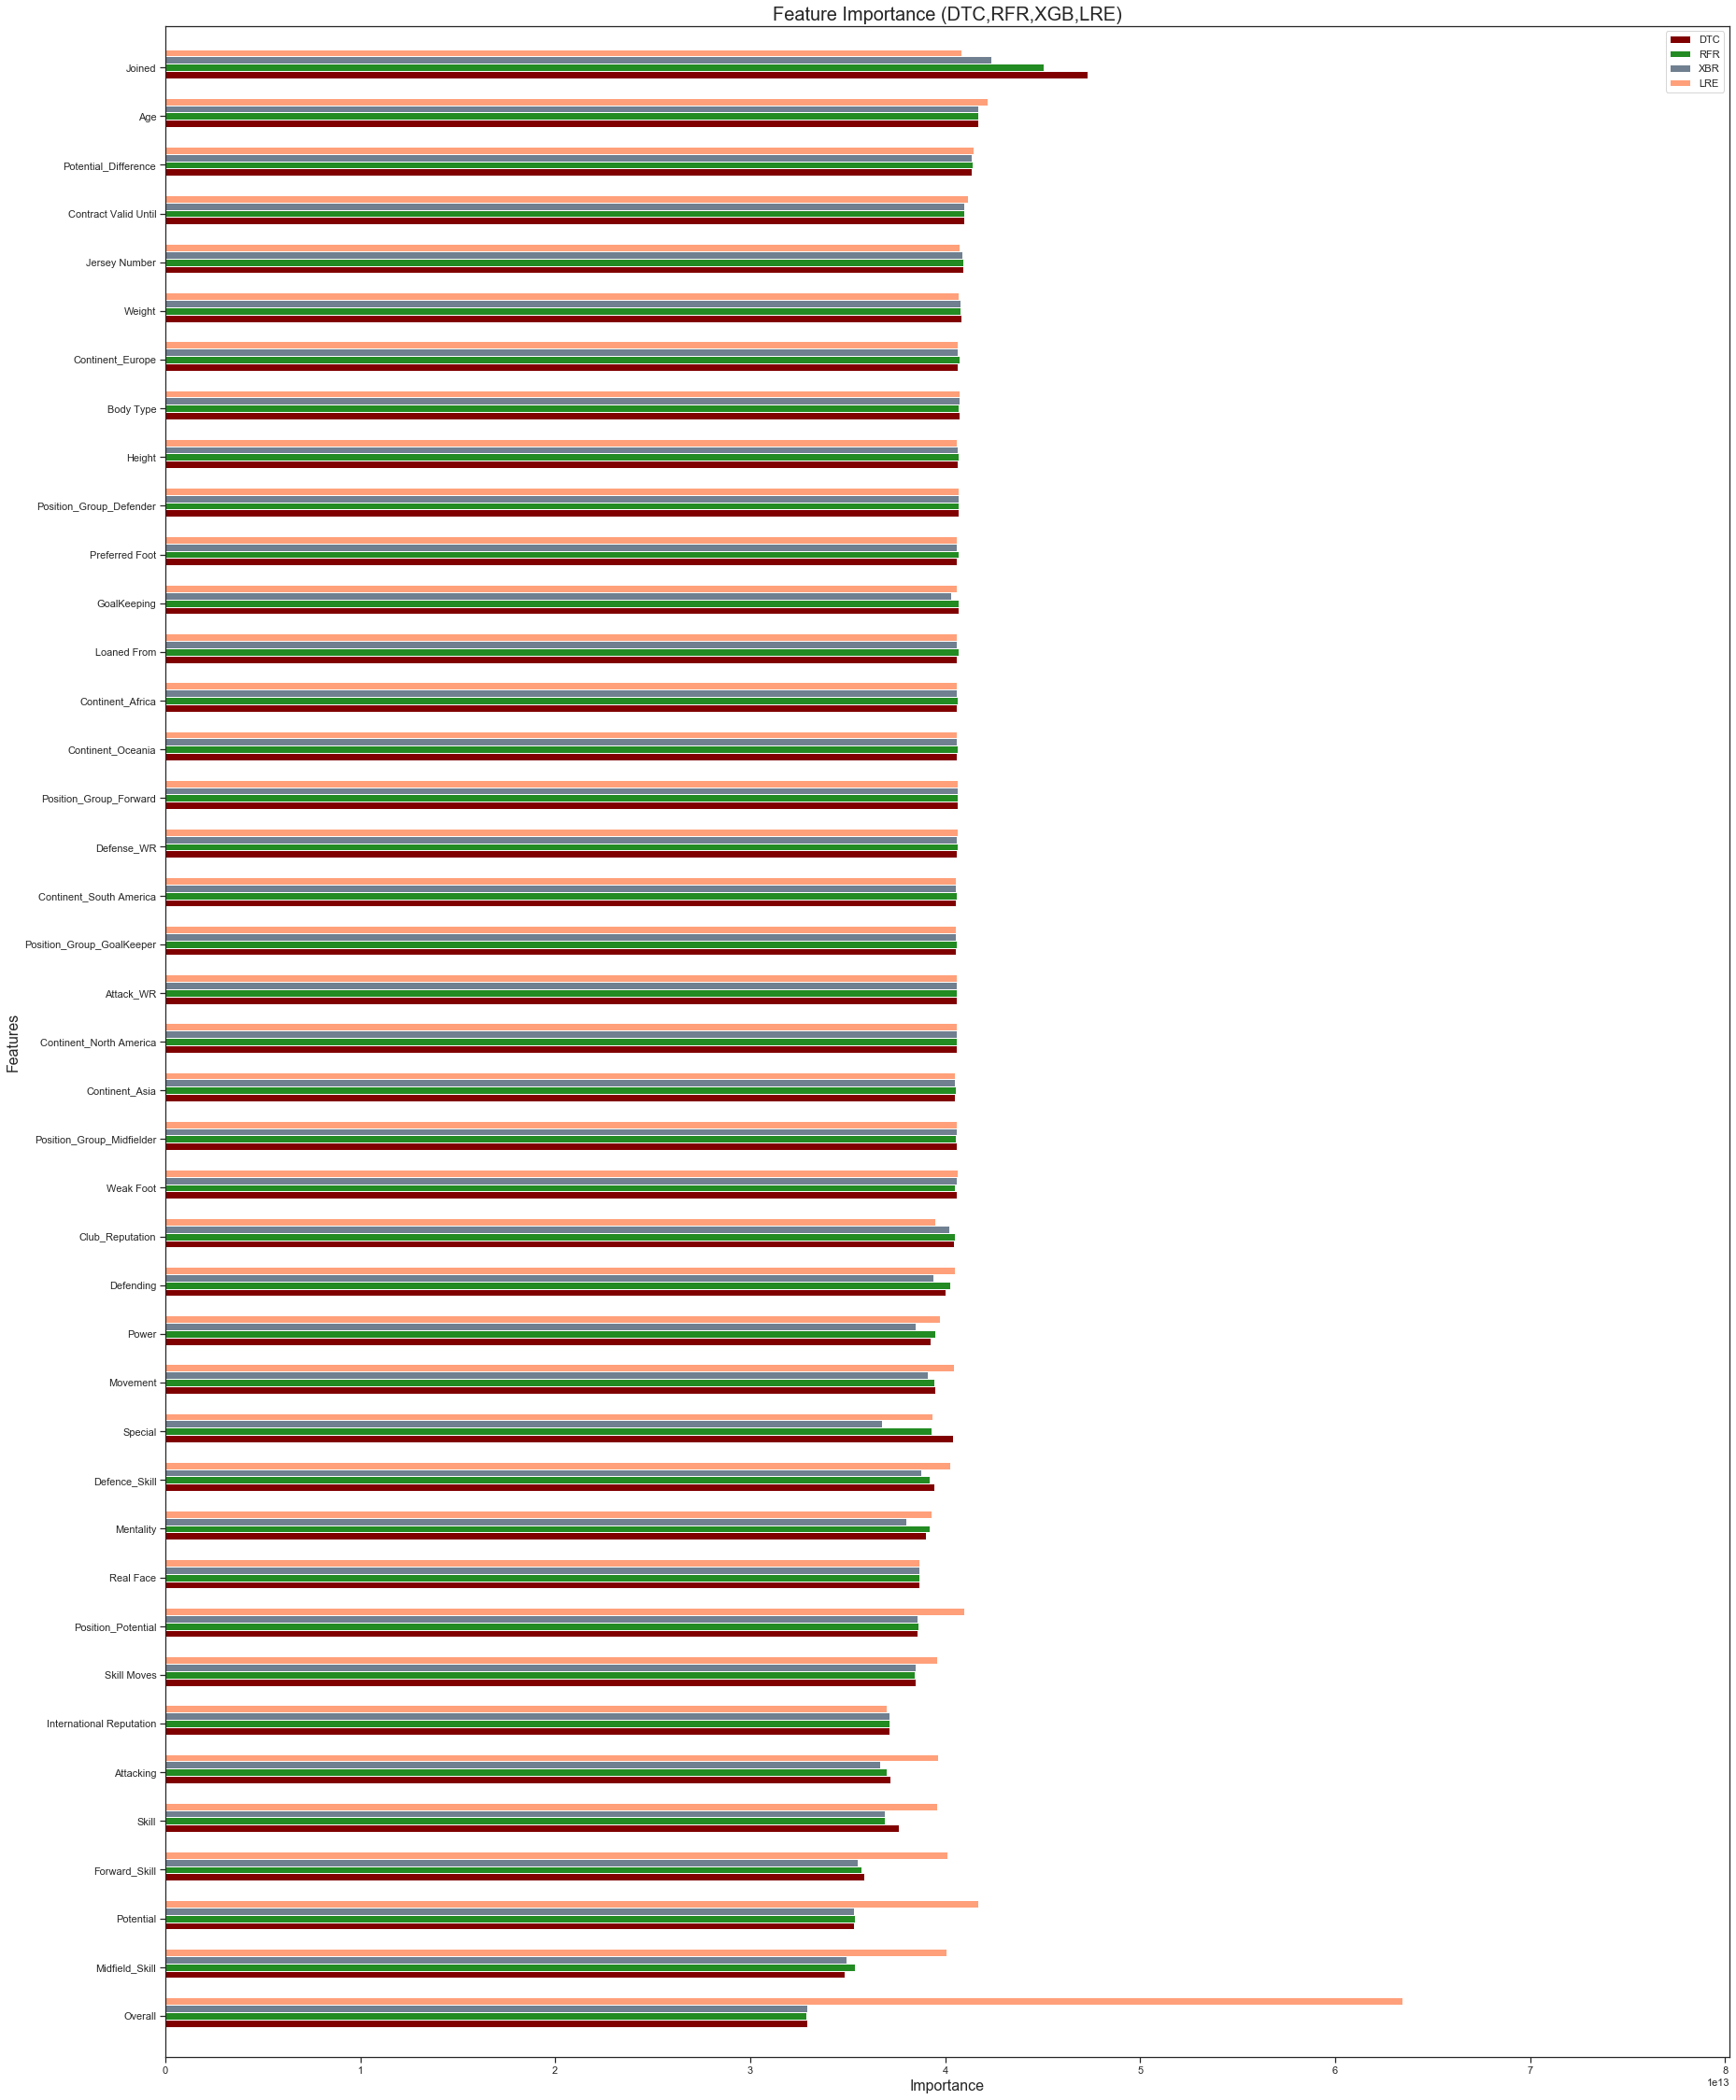

In [104]:
importance = pd.DataFrame(dict(graph=feature_scores['Feature'], DTC=feature_scores['DTC'], RFR=feature_scores['RFR'], XBR=feature_scores['XBR'],LRE=feature_scores['LRE'])) 

ind = np.arange(len(importance))
width = 0.15

fig, ax = plt.subplots(figsize=(30,40))
ax.barh(ind, importance.DTC, width, color='maroon', label='DTC')
ax.barh(ind + width, importance.RFR, width, color='forestgreen', label='RFR')
ax.barh(ind + 2*width, importance.XBR, width, color='slategrey', label='XBR')
ax.barh(ind + 3*width, importance.LRE, width, color='lightsalmon', label='LRE')
ax.set_xlim(0, max(importance.DTC)+min(importance.DTC))
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('Feature Importance (DTC,RFR,XGB,LRE)',fontsize=20)

ax.set(yticks=ind + width, yticklabels=importance.graph, ylim=[2*width - 1, len(importance)])
ax.legend()

plt.show()

Dropping Jersey Number and Potential Difference to avoid overfitting:

In [105]:
predictors_df=predictors_df.drop(['Potential_Difference','Jersey Number'],axis=1)

Re-running baseline model:

In [106]:
train_predictors_val, test_predictors_val, train_target_val, test_target_val = train_test_split(predictors_df,
                                                                                                target_val,
                                                                                                test_size=0.2,
                                                                                                stratify=y_binned)

In [107]:
train_predictors_val.shape

(14527, 39)

In [108]:
numeric_cols=['Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Club_Reputation',
       'Position_Potential', 'Attacking', 'Skill', 'Movement', 'Power',
       'Mentality', 'Defending', 'GoalKeeping', 'Potential_Difference']

from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

fifa_num_df = pd.DataFrame(scl.fit_transform(fifa_numeric_cols), columns=numeric_cols)

fifa_num_df.head()

Age   Overall  Potential     Value      Wage  \
0  1.258441  4.013364   3.697415  2.213984 -1.819966   
1  1.686666  4.013364   3.697415  2.309273  0.549461   
2  0.187878  3.724114   3.534396  1.997752  0.549461   
3  0.401990  3.579489   3.534396 -0.465097  0.549461   
4  0.401990  3.579489   3.371377  2.503515  0.549461   

   International Reputation  Weak Foot  Skill Moves  Real Face  Jersey Number  \
0                  9.864420   1.593944     2.167171    3.15893      -0.598105   
1                  9.864420   1.593944     3.489672    3.15893      -0.786241   
2                  9.864420   3.108090     3.489672    3.15893      -0.598105   
3                  7.326477   0.079797    -1.800331    3.15893      -1.162514   
4                  7.326477   3.108090     2.167171    3.15893      -0.786241   

     Joined  Loaned From  Contract Valid Until    Height    Weight        LS  \
0  5.920259    -0.273523              0.673625 -1.670713 -0.447583  1.818665   
1 -0.693701    -0.273523              1.437527  1.019186  1.091577  1.967451   
2 -0.253373    -0.273523              1.437527 -0.923519 -1.024769  1.620283   
3  2.619735    -0.273523             -0.090277  1.766380  0.129602 -2.545731   
4  0.655691    -0.273523              2.201428 -0.176325 -0.768242  1.521092   

         ST        RS        LW        LF        CF        RF        RW  \
0  1.818665  1.818665  1.901392  1.973099  1.973099  1.973099  1.901392   
1  1.967451  1.967451  1.757292  1.828258  1.828258  1.828258  1.757292   
2  1.620283  1.620283  1.757292  1.779978  1.779978  1.779978  1.757292   
3 -2.545731 -2.545731 -2.517663 -2.516977 -2.516977 -2.516977 -2.517663   
4  1.521092  1.521092  1.661226  1.683417  1.683417  1.683417  1.661226   

        LAM       CAM       RAM        LM       LCM        CM       RCM  \
0  1.957564  1.957564  1.957564  1.828702  1.603458  1.603458  1.603458   
1  1.716682  1.716682  1.716682  1.684202  1.454577  1.454577  1.454577   
2  1.764859  1.764859  1.764859  1.684202  1.454577  1.454577  1.454577   
3 -2.522831 -2.522831 -2.522831 -2.554472 -2.565223 -2.565223 -2.565223   
4  1.716682  1.716682  1.716682  1.684202  1.752340  1.752340  1.752340   

         RM       LWB       LDM       CDM       RDM       RWB        LB  \
0  1.828702  0.646400  0.519988  0.519988  0.519988  0.646400  0.427328   
1  1.684202  0.696360  0.519988  0.519988  0.519988  0.696360  0.527106   
2  1.684202  0.696360  0.470696  0.470696  0.470696  0.696360  0.477217   
3 -2.554472 -2.551047 -2.486788 -2.486788 -2.486788 -2.551047 -2.516127   
4  1.684202  1.295881  1.308650  1.308650  1.308650  1.295881  1.125774   

        LCB        CB       RCB        RB  Crossing  Finishing  \
0 -0.114632 -0.114632 -0.114632  0.427328  1.865922   2.532567   
1  0.174842  0.174842  0.174842  0.527106  1.865922   2.481351   
2 -0.114632 -0.114632 -0.114632  0.477217  1.593650   2.122842   
3 -2.382176 -2.382176 -2.382176 -2.516127 -1.782517  -1.667116   
4  0.802035  0.802035  0.802035  1.125774  2.356010   1.866764   

   HeadingAccuracy  ShortPassing   Volleys  Dribbling     Curve  FKAccuracy  \
0         1.018552      2.130287  2.435355   2.201445  2.491426    2.925736   
1         2.111799      1.518005  2.491871   1.725503  1.839066    1.895887   
2         0.558238      1.722099  2.322322   2.148563  2.219609    2.525239   
3        -1.800873     -0.590969 -1.690356  -1.976272 -1.422733   -1.365303   
4         0.155463      2.266350  2.209288   1.619738  2.056519    2.296384   

   LongPassing  BallControl  Acceleration  SprintSpeed   Agility  Reactions  \
0     2.237037     2.255198      1.767621     1.452129  1.862187   3.680643   
1     1.584613     2.135338      1.633639     1.793436  1.591288   3.791628   
2     1.649855     2.195268      1.968594     1.725175  2.200811   3.569658   
3    -0.111691    -0.981022     -0.510075    -0.459193 -0.237281   3.125717   
4     2.498007     1.955548      0.896737     0.769514  1.049490   3.236703   

   

In [109]:
scaler = StandardScaler()
train_predictors_val = scaler.fit_transform(train_predictors_val)
test_predictors_val = scaler.fit_transform(test_predictors_val)

In [110]:
dtc=DecisionTreeRegressor()
rfr=RandomForestRegressor()
xbr=xgb.XGBRegressor()
lre=LinearRegression()

models = [dtc,rfr,xbr,lre]

for mod in models:
    mod.fit(train_predictors_val, train_target_val)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[21:18:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [111]:
test_error = []

# Sequentially fit all models and calculate test score
for mod in models:
    y_pred = mod.predict(test_predictors_val)
    mse_mod = MSE(test_target_val, y_pred)
    rmse_mod = mse_mod**(1/2)
    test_error.append(rmse_mod)

In [112]:
cv_error=[]

for mod in models:
    MSE_cv_error = -cross_val_score(mod, train_predictors_val,
                                    train_target_val, scoring='neg_mean_squared_error', n_jobs=-1)
    RMSE_cv = (MSE_cv_error.mean())**(1/2)
    cv_error.append(RMSE_cv)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



In [113]:
train_error=[]

# Sequentially fit all models and calculate train score
for mod in models:
    y_pred = mod.predict(train_predictors_val)
    mse_mod = MSE(train_target_val, y_pred)
    rmse_mod = mse_mod**(1/2)
    train_error.append(rmse_mod)

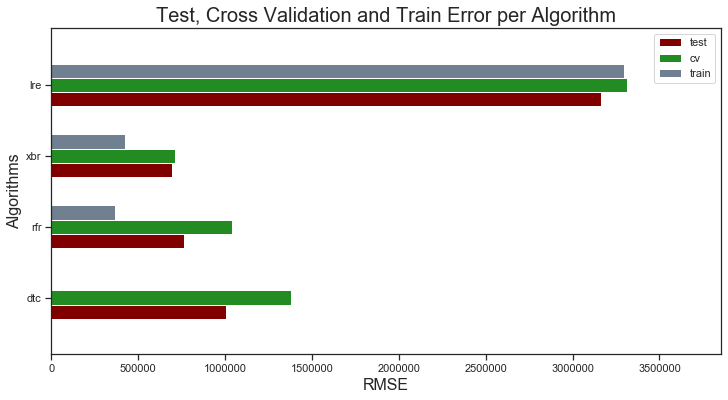

In [114]:
model_names = ['dtc','rfr','xbr','lre']

error = pd.DataFrame(dict(graph=model_names,test_error=test_error, cv_error=cv_error, train_error=train_error)) 
#error = pd.DataFrame(dict(graph=model_names,test_error=test_error, train_error=train_error)) 

ind = np.arange(len(error))
width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
ax.barh(ind, error.test_error, width, color='maroon', label='test')
ax.barh(ind + width, error.cv_error, width, color='forestgreen', label='cv')
ax.barh(ind + 2*width, error.train_error, width, color='slategrey', label='train')
ax.set_xlim(0, max(error.test_error)+min(error.test_error))
plt.xlabel('RMSE', fontsize=16)
plt.ylabel('Algorithms', fontsize=16)
plt.title('Test, Cross Validation and Train Error per Algorithm',fontsize=20)

ax.set(yticks=ind + width, yticklabels=error.graph, ylim=[2*width - 1, len(error)])
ax.legend()

plt.show()


In [115]:
error

graph    test_error      cv_error   train_error
0   dtc  1.004017e+06  1.380450e+06  0.000000e+00
1   rfr  7.654722e+05  1.040945e+06  3.641081e+05
2   xbr  6.924231e+05  7.098324e+05  4.226936e+05
3   lre  3.161212e+06  3.310704e+06  3.294785e+06

In [116]:
train_predictors_val

array([[ 1.69292477, -0.32959729, -1.20536015, ..., -0.41724446,
        -0.13647946,  0.29478958],
       [-0.88076616, -0.03958761,  0.59803045, ...,  0.48440714,
         0.58693472,  0.39384717],
       [ 1.47845052,  1.55546562,  0.92591965, ...,  1.16064584,
         0.98276513,  0.65564223],
       ...,
       [ 1.90739901, -0.47460212, -1.36930475, ...,  0.17979512,
         0.25935094,  0.53535801],
       [-1.73866313, -1.77964567, -0.54958175, ...,  0.09450375,
        -0.33666955, -0.61087982],
       [ 0.19160506,  0.68543658,  0.10619665, ...,  0.80729589,
         0.43679216, -0.02360982]])

# Similar Player Recommendation

In [262]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

scaled = StandardScaler()
X = scaled.fit_transform(predictors_df)
recommendations = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(X)

In [263]:
#Pass the player name from the dataset to the function and get 5 similar players as output
player_indices = recommendations.kneighbors(X)[1]

def get_index(x):
    return fifa[fifa['Name']==x].index.tolist()[0]

def recommend_me(player):
    print('Here are 5 players similar to', player, ':' '\n')
    index = get_index(player)
    recommend_list = []
    for i in player_indices[index][1:]:
            print(fifa.iloc[i]['Name'], '\n')
            recommend_list.append(fifa.iloc[i]['Name'])
    recommend_list.insert(0, player)
    return recommend_list

recommendation = recommend_me("E. Hazard")

print(recommendation)

Here are 5 players similar to E. Hazard :

R. Lewandowski 

Isco 

S. Agüero 

D. Mertens 

K. Benzema 

['E. Hazard', 'R. Lewandowski', 'Isco', 'S. Agüero', 'D. Mertens', 'K. Benzema']


In [264]:
rador_variables = ['Age', 'Overall', 'Potential', 'Attacking', 'Skill',
       'Movement', 'Power', 'Mentality', 'Defending', 'GoalKeeping','Forward_Skill', 
                   'Midfield_Skill', 'Defence_Skill']

In [265]:
def RadorChart(graph, abilities, player_name):
    len1 = graph.shape[0]
    len2 = graph.shape[1]
    temp = graph.values.reshape((len1, len2))
    
    tmp = pd.DataFrame(temp, columns = abilities)
    Attributes =list(tmp)
    AttNo = len(Attributes)
    
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    
    colors = ['green', 'blue', 'red', 'black', 'gold', 'orange', 'lightskyblue', 'pink']
    
    for i in range(len1):
        values = tmp.iloc[i].tolist() #
        values += values [:1]
    
        angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
        angles += angles [:1]
        
        plt.xticks(angles[:-1],Attributes)
        ax.plot(angles, values, color = colors[i])
        ax.fill(angles, values, colors[i], alpha=0.1)
        plt.figtext(0.8, 0.18-0.022*i, player_name[i], color = colors[i], fontsize=12)
    
    plt.show()

In [266]:
standard_player = predictors_df[rador_variables][fifa.Name.isin(recommendation)]
standard_player = standard_player.set_index(pd.Index(fifa.Name[standard_player.index].values))

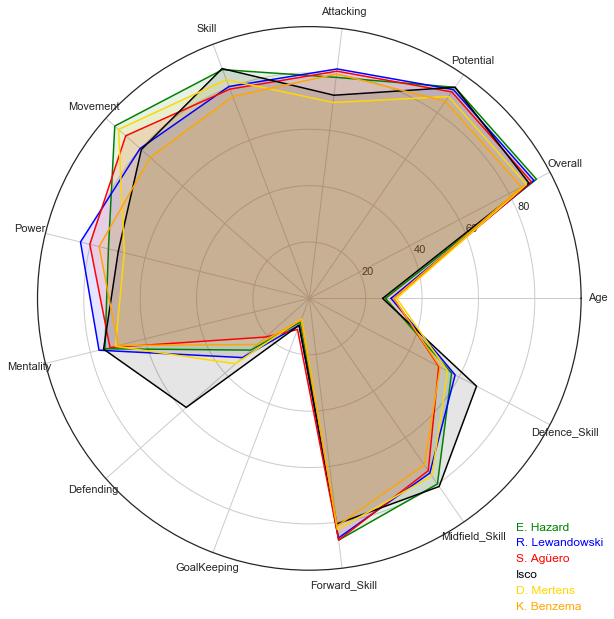

In [267]:
RadorChart(graph= standard_player, 
           abilities = rador_variables, 
           player_name = pd.Series(standard_player.index).values)

# Clustering

In [ ]:
from sklearn.decomposition import PCA

scaled = StandardScaler()
X = scaled.fit_transform(predictors_df)

pca = PCA().fit(X)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

skillsPCA_labels = kmeans.fit_predict(skillsPCA)
In [12]:
dfskillsPCA = pd.DataFrame(skillsPCA)
dfskillsPCA['cluster'] = skillsPCA_labels

#Clustering 1A: Visualize clustering-1 using TSNE (5D > 2D)
#The TSNE here is created from the 5D PCA components. In contrast, later on we will create the TSNE that is based on the original 34 variables. We will see later that the visualized 2D scatter doesn't look to different. However, the computational time required for TSNE from original vector space is much longer

#In [13]:


In [139]:
#Value binning based on 5 quantile groups
y_binned_quantile = pd.qcut(target_val,5, labels=[1,2,3,4,5])

In [141]:
from sklearn.manifold import TSNE

scaled = StandardScaler()
X = scaled.fit_transform(predictors_df)

Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = y_binned_quantile
dftsne.columns = ['x1','x2','cluster']



### Visualizing TSNE with points colored by Value bins (y_binned_quantile)

Text(0.5, 1.0, 'TSNE Reduction Colored by Value Bin')

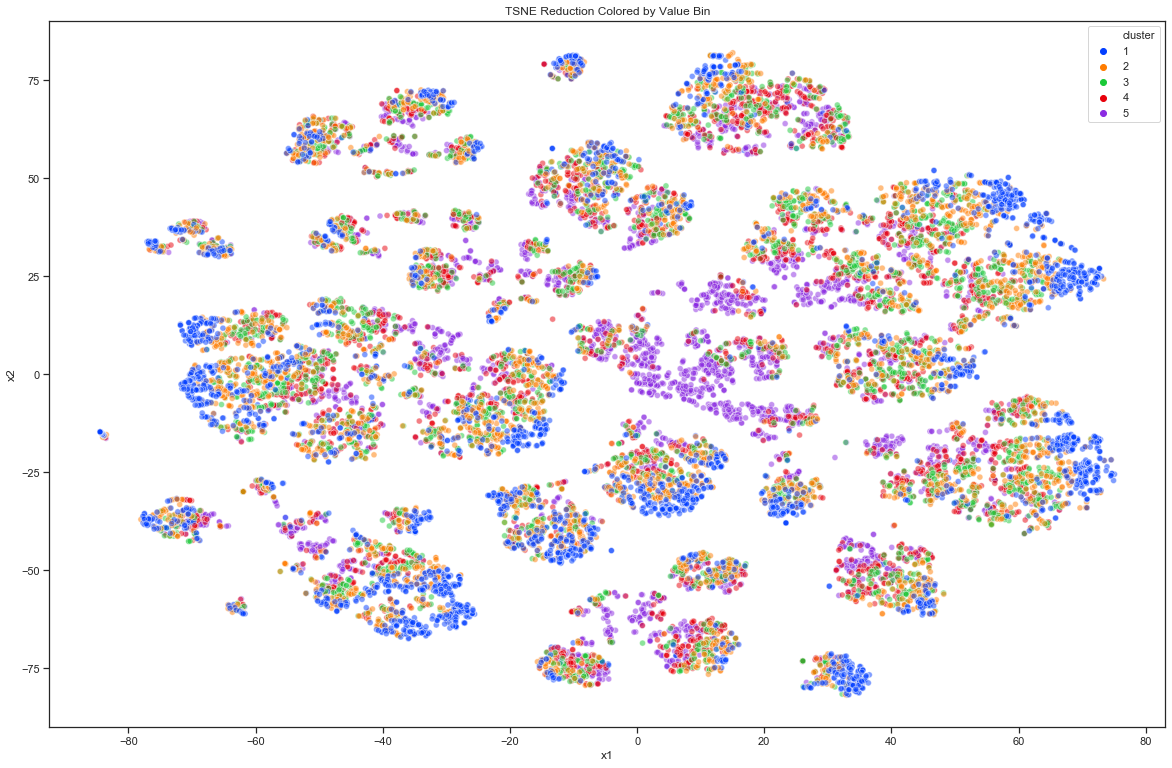

In [164]:
fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", 5)
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,palette=cmap ,ax=ax)
ax.set_title('TSNE Reduction Colored by Value Bin')



### Let's try coloring TSNE using position group

In [154]:
dftsne['Position_Group_Labels'] = fifa.Position_Group

Text(0.5, 1.0, 'TSNE Reduction Colored by Position Group')

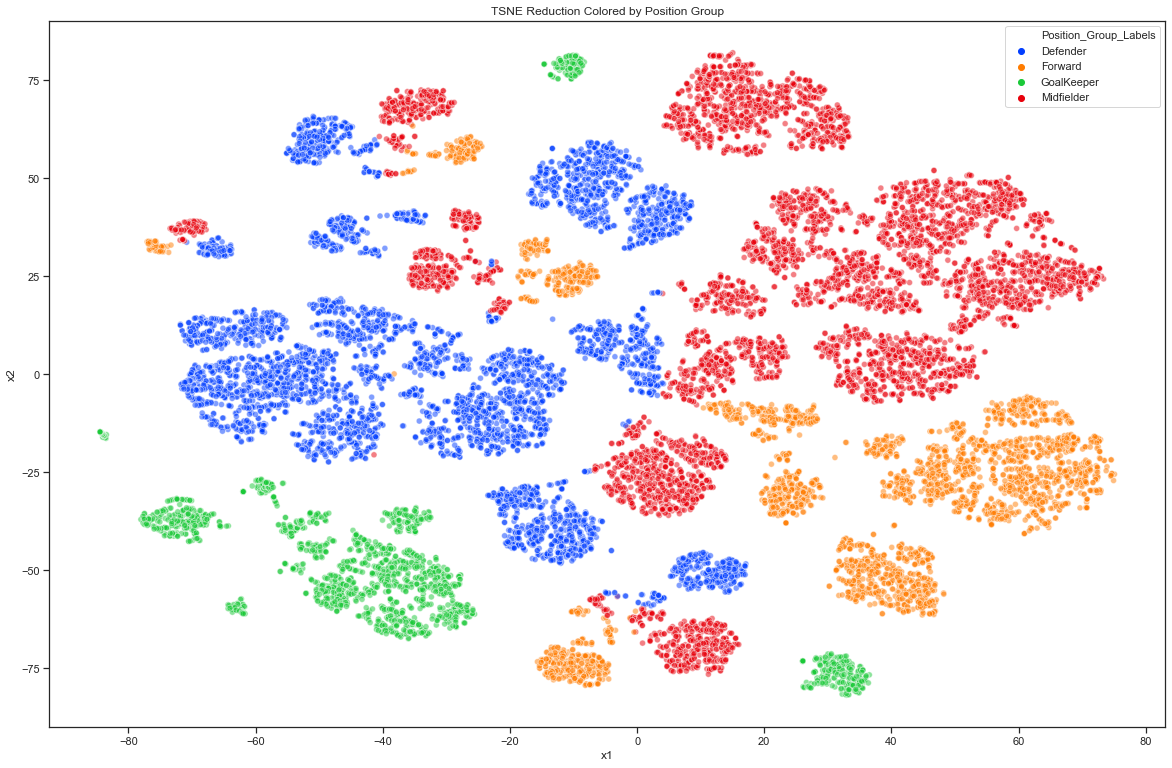

In [163]:
fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Position_Group_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Position Group')


### Try by Continent

Text(0.5, 1.0, 'TSNE Reduction Colored by Continent')

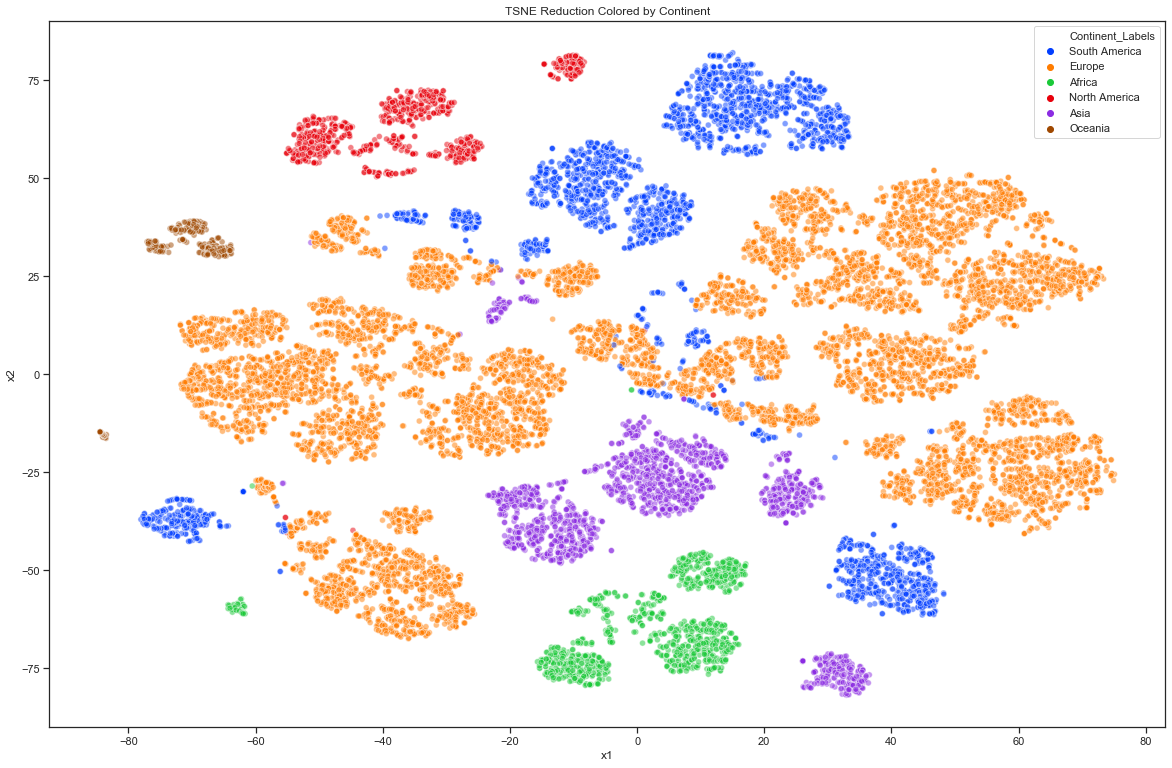

In [170]:
dftsne['Continent_Labels'] = fifa.Continent

fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Continent_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Continent')

In [0]:
numeric_fifa = fifa[['Age', 'Overall', 'Potential',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']]

#Limit to only popular clubs (reputation over 45)
numeric_fifa = numeric_fifa[fifa['Club_Reputation'] > 45]

#numeric_fifa.groupby(fifa['Club']).sum().sort_values(by = 'Overall', ascending = False)

numeric_fifa_byclub = numeric_fifa.groupby(fifa['Club']).sum()

#Drop limited NA rows
numeric_fifa_byclub.dropna(axis = 'rows', inplace = True)

#Get Values
numeric_values = numeric_fifa_byclub.values

#Get Labels for dendogram
club_labels = fifa.Club[fifa['Club_Reputation'] > 45].values


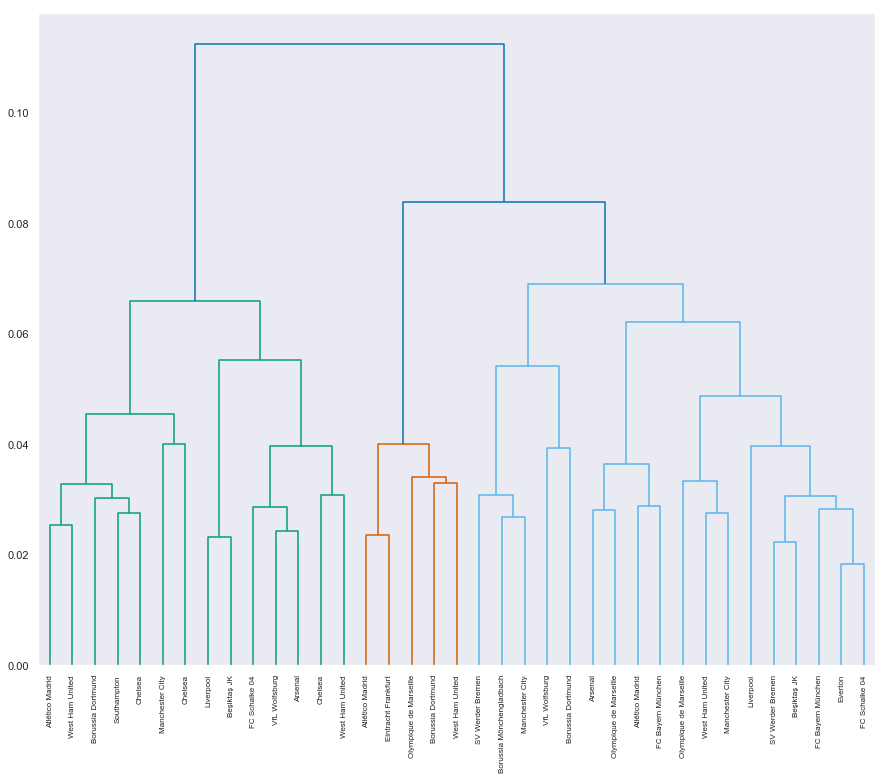

In [0]:
# Any Pre-processing needed?
normalized_numeric = normalize(numeric_values)
plt.figure(figsize=(15,12))

# Calculate the linkage: mergings
mergings = linkage(normalized_numeric, method= 'ward')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=club_labels,
    leaf_rotation=90.,
    leaf_font_size=8)


plt.show()

In [0]:
fifa.Club.nunique()

651

In [0]:
fifa.Club.value_counts()

Borussia Dortmund                33
Rayo Vallecano                   33
Fortuna Düsseldorf               33
Atlético Madrid                  33
Empoli                           33
Wolverhampton Wanderers          33
Everton                          33
Burnley                          33
Eintracht Frankfurt              33
Arsenal                          33
Southampton                      33
FC Barcelona                     33
Frosinone                        33
Tottenham Hotspur                33
Liverpool                        33
Cardiff City                     33
TSG 1899 Hoffenheim              33
Manchester United                33
RC Celta                         33
AS Monaco                        33
CD Leganés                       33
Real Madrid                      33
Newcastle United                 33
Manchester City                  33
Valencia CF                      33
Chelsea                          33
Villarreal CF                    32
Fulham                      

In [0]:
fifa.loc[:,['Club','International Reputation']].groupby('Club').sum().sort_values(by ='International Reputation',  ascending = False)

International Reputation
Club                                                   
FC Barcelona                                       74.0
FC Bayern München                                  73.0
Chelsea                                            70.0
Manchester United                                  69.0
Manchester City                                    69.0
Real Madrid                                        69.0
Arsenal                                            67.0
Paris Saint-Germain                                67.0
Borussia Dortmund                                  66.0
Tottenham Hotspur                                  66.0
Liverpool                                          65.0
Juventus                                           63.0
Atlético Madrid                                    62.0
Milan                                              57.0
West Ham United                                    57.0
Napoli                                             54.0
FC Porto                                           53.0
Fenerbahçe SK                                      52.0
Roma                                               52.0
Inter                                              52.0
Beşiktaş JK                                        51.0
Lazio                                              51.0
Everton                                            51.0
Villarreal CF                                      50.0
AS Monaco                                          50.0
Sevilla FC                                         49.0
Valencia CF                                        48.0
Olympique de Marseille                             48.0
Borussia Mönchengladbach                           47.0
VfL Wolfsburg                                      47.0
Eintracht Frankfurt                                46.0
Ajax                                               46.0
FC Schalke 04                                      46.0
SV Werder Bremen                                   46.0
Leicester City                                     46.0
Sporting CP                                        46.0
Southampton                                        46.0
TSG 1899 Hoffenheim                                45.0
Stoke City                                         45.0
Crystal Palace                                     45.0
Wolverhampton Wanderers                            44.0
SL Benfica                                         44.0
Athletic Club de Bilbao                            44.0
Hertha BSC                                         43.0
Bayer 04 Leverkusen                                43.0
Medipol Başakşehir FK                              42.0
FC Augsburg                                        42.0
Galatasaray SK                                     42.0
Olympique Lyonnais                                 42.0
Newcastle United                                   41.0
...                                                 ...
VfR Aalen                                          24.0
Hobro IK                                           24.0
Śląsk Wrocław                                      24.0
Sandefjord Fotball                                 24.0
Os Belenenses                                      24.0
Oldham Athletic                                    24.0
Crawley Town                                       24.0
Ranheim Fotball                                    24.0
Cheltenham Town                                    24.0
Lillestrøm SK                                      24.0
SG Sonnenhof Großaspach                            24.0
Forest Green Rovers                                24.0
Carlisle United                                    24.0
SV Wehen Wiesbaden                                 24.0
La Berrichonne de Châteauroux                      24.0
IK Start                                           24.0
Strømsgodset IF                                    24.0
IFK Norrköping                                     24.0
GIF Sundsvall                                      23.0

# APPENDIX

## Defining an Undervalued Player

In [0]:
#Average time player stays at a team
#avg_stay = (fifa.Joined.mean()/365)*12
#avg_stay

23.415377860859216

In [0]:
#scaled = StandardScaler()

#Average Overall/Potential

#scaled_avg_overpot = scaled.fit_transform(np.array(avg_over_pot).reshape(-1,1))

#Scale Wage & Value
#scaled_wage = scaled.fit_transform(np.array(fifa.Wage).reshape(-1,1))
#scaled_value = scaled.fit_transform(np.array(fifa.Value).reshape(-1,1))

#Average of scaled
#scaled_avg_wagevalue = (scaled_wage+scaled_value)/2


#undervalued_score = scaled_avg_overpot/scaled_avg_wagevalue


#avg_over_pot = (fifa.Overall+fifa.Potential)/2

#avg_value_age = (fifa.Value+(fifa.Wage*avg_stay))/2

#undervalued_score = avg_over_pot/avg_value_age

#maxx = undervalued_score[undervalued_score != np.inf].max()
#undervalued_score.replace(np.inf,maxx,inplace=True)

#undervalued_score_scaled = scaled.fit_transform(np.array(undervalued_score).reshape(-1,1))

In [0]:
#fifa['undervalued_score'] = undervalued_score_scaled

In [0]:
#fifa.sort_values(by = 'undervalued_score', ascending = True).head()

ID          Name  Age Nationality  Overall  Potential  \
2    2     Neymar Jr   26      Brazil       92         93   
0    0      L. Messi   31   Argentina       94         94   
4    4  K. De Bruyne   27     Belgium       91         92   
5    5     E. Hazard   27     Belgium       91         91   
15  15     P. Dybala   24   Argentina       89         94   

                   Club        Value      Wage  Special  Preferred Foot  \
2   Paris Saint-Germain  118500000.0  290000.0     2143               1   
0          FC Barcelona  110500000.0  565000.0     2202               0   
4       Manchester City  102000000.0  355000.0     2281               1   
5               Chelsea   93000000.0  340000.0     2142               1   
15             Juventus   89000000.0  205000.0     2092               0   

    International Reputation  Weak Foot  Skill Moves Body Type  Real Face  \
2                        5.0        5.0          5.0      Lean          1   
0                        5.0        4.0          4.0      Lean          1   
4                        4.0        5.0          4.0    Normal          1   
5                        4.0        4.0          4.0    Normal          1   
15                       3.0        3.0          4.0    Normal          1   

   Position  Jersey Number  Joined  Loaned From  Contract Valid Until  Height  \
2        LW           10.0     516            0                     4     175   
0        RF           10.0    5297            0                     3     170   
4       RCM            7.0    1220            0                     5     180   
5        LF           10.0    2375            0                     2     173   
15       LF           21.0    1280            0                     4     178   

    Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  \
2      150  84  84  84  89  89  89  89  89   89   89   89  88   81  81   81   
0      159  88  88  88  92  93  93  93  92   93   93   93  91   84  84   84   
4      154  82  82  82  87  87  87  87  87   88   88   88  88   87  87   87   
5      163  83  83  83  89  88  88  88  89   89   89   89  89   82  82   82   
15     165  83  83  83  87  86  86  86  87   87   87   87  86   79  79   79   

    RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  \
2   88   65   60   60   60   65  60   47  47   47  60      79.0       87.0   
0   91   64   61   61   61   64  59   47  47   47  59      84.0       95.0   
4   88   77   77   77   77   77  73   66  66   66  73      93.0       82.0   
5   89   66   63   63   63   66  60   49  49   49  60      81.0       84.0   
15  86   62   58   58   58   62  56   45  45   45  56      82.0       84.0   

    HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
2              62.0          84.0     84.0       96.0   88.0        87.0   
0              70.0          90.0     86.0       97.0   93.0        94.0   
4              55.0          92.0     82.0       86.0   85.0        83.0   
5              61.0          89.0     80.0       95.0   83.0        79.0   
15             68.0          87.0     88.0       92.0   88.0        88.0   

    LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
2          78.0         95.0          94.0         90.0     96.0       94.0   
0          87.0         96.0          91.0         86.0     91.0       95.0   
4          91.0         91.0          78.0         76.0     79.0       91.0   
5          83.0         94.0          94.0         88.0     95.0       90.0   
15         75.0         92.0          87.0         83.0     91.0       86.0   

    Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
2      84.0       80.0     61.0     81.0      49.0       82.0        56.0   
0      95.0       85.0     68.0     72.0      59.0       94.0        48.0   
4      77.0       91.0     63.0     90.0      75.0       91.0        76.0   
5      94.0       82.0     56.0     83.0      66.0  

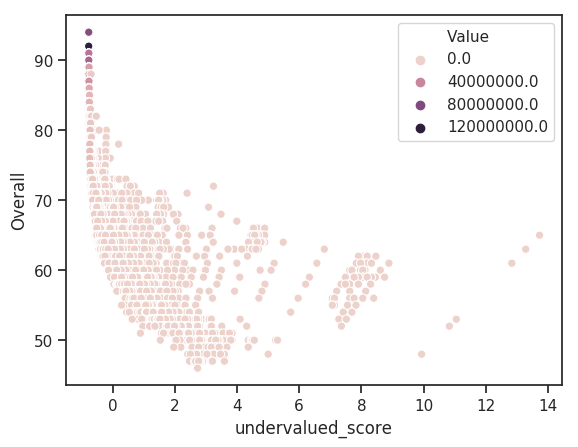

In [0]:
#sns.scatterplot(x ='undervalued_score', y = 'Overall', hue = 'Value', data = fifa)

In [ ]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#position_group_labels = le.fit_transform(fifa.Position_Group)
#